Isolation Forest are tree based model or algorithm introduced by Fei Tony Liu and Zhi- Hua Zhou in 2008. It uses decision trees to efficiently isolate anomalies by randomly selecting features and splitting data based on threshold values (minimum and maximum values of the selected features). This approach is effective in quickly identifying outliers, making it well-suited for large datasets where anomalies are rare and distinct. It works best on high- dimensional data.

> Isolation Forest is different from traditional classifiers in several key ways:

1. Purpose:
Isolation Forest: Primarily designed for anomaly detection. It identifies outliers or anomalies within a dataset without requiring labeled data. It’s an unsupervised learning method.
Classifiers: Designed for classification tasks where the goal is to categorize data into predefined classes. They usually require labeled data (supervised learning).
2. Approach:
Isolation Forest: Isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. It creates a binary tree where anomalies, which are less frequent, are isolated more quickly (resulting in shorter paths in the tree).
Classifiers: Use various techniques like decision trees, support vector machines, neural networks, etc., to learn from labeled data and make predictions about the class of new, unseen instances.
3. Output:
Isolation Forest: Outputs an anomaly score for each instance, indicating how isolated (and therefore how likely to be an outlier) the instance is. Instances with a high anomaly score are considered outliers.
Classifiers: Output the predicted class label for each instance, often with a probability or confidence score for each class.
4. Training Data:
Isolation Forest: Doesn’t require labeled data and works on unlabeled datasets, making it suitable for scenarios where normal versus abnormal behavior is not well defined.
Classifiers: Typically require labeled training data, where each instance is associated with a known class label.
5. Use Cases:
Isolation Forest: Used in scenarios where the goal is to detect rare events or outliers, such as fraud detection, network intrusion detection, or identifying defective products.
Classifiers: Used in scenarios where the goal is to categorize data into known classes, such as spam detection, sentiment analysis, or image classification.

# **Installing important libraries**

In [110]:
%pip install numpy pandas seaborn matplotlib optuna sklearn xgboost catboost lightgbm > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.


# **Importing libraries**

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
import os
from sklearn.ensemble import IsolationForest

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/Train_data.csv
/kaggle/input/Test_data.csv


# **Data Preprocessing & EDA**

In [112]:
train=pd.read_csv('/kaggle/input/Train_data.csv')
test=pd.read_csv('/kaggle/input/Test_data.csv')
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [113]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [114]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [115]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


# **Handeling Missing data**

In [117]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

# **Handeling Duplicate data**

In [118]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


# **Outliers**

In [119]:
'''
import plotly.express as px
import pandas as pd

# Example: Load your DataFrame (replace with your own data source)
# df = pd.read_csv('your_data.csv')

def plot_interactive(train, column):
    if pd.api.types.is_numeric_dtype(train[column]):
        # Numeric column: create a boxplot and scatter plot
        fig_box = px.box(train, y=column, title=f'Distribution of {column}')
        fig_box.update_layout(yaxis_title=column)
        fig_box.show()

        # Scatter plot against the 'class' column
        if 'class' in train.columns:
            fig_scatter = px.scatter(train, x=column, y='class',
                                    title=f'Scatter Plot of {column} vs class',
                                    labels={column: column, 'class': 'Class'})
            fig_scatter.update_layout(xaxis_title=column, yaxis_title='class')
            fig_scatter.show()
    else:
        # Categorical column: create a bar plot for distribution
        fig_bar = px.bar(train[column].value_counts().reset_index(),
                        x='index', y=column,
                        title=f'Distribution of {column}')
        fig_bar.update_layout(xaxis_title=column, yaxis_title='Count')
        fig_bar.show()

# List of all columns in the DataFrame
columns = train.columns

# Generate plots for each column
for column in columns:
    plot_interactive(train, column)
'''

"\nimport plotly.express as px\nimport pandas as pd\n\n# Example: Load your DataFrame (replace with your own data source)\n# df = pd.read_csv('your_data.csv')\n\ndef plot_interactive(train, column):\n    if pd.api.types.is_numeric_dtype(train[column]):\n        # Numeric column: create a boxplot and scatter plot\n        fig_box = px.box(train, y=column, title=f'Distribution of {column}')\n        fig_box.update_layout(yaxis_title=column)\n        fig_box.show()\n\n        # Scatter plot against the 'class' column\n        if 'class' in train.columns:\n            fig_scatter = px.scatter(train, x=column, y='class',\n                                    title=f'Scatter Plot of {column} vs class',\n                                    labels={column: column, 'class': 'Class'})\n            fig_scatter.update_layout(xaxis_title=column, yaxis_title='class')\n            fig_scatter.show()\n    else:\n        # Categorical column: create a bar plot for distribution\n        fig_bar = px.bar(

In [120]:
'''
fig_scatter = px.scatter(train, x='dst_host_serror_rate', y='class',
                        title='Scatter Plot of dst_host_serror_rate vs class')
fig_scatter.show()
'''

"\nfig_scatter = px.scatter(train, x='dst_host_serror_rate', y='class',\n                        title='Scatter Plot of dst_host_serror_rate vs class')\nfig_scatter.show()\n"

In [121]:
'''# Scatter plot with color encoding for 'class'
fig_scatter_colored = px.scatter(train, x='dst_host_serror_rate', y='class',
                                 color='class',  # Color by 'class'
                                 title='Scatter Plot of dst_host_serror_rate vs class',
                                 labels={'dst_host_serror_rate': 'Destination Host Serror Rate',
                                         'class': 'Class'})
fig_scatter_colored.show()
'''

"# Scatter plot with color encoding for 'class'\nfig_scatter_colored = px.scatter(train, x='dst_host_serror_rate', y='class',\n                                 color='class',  # Color by 'class'\n                                 title='Scatter Plot of dst_host_serror_rate vs class',\n                                 labels={'dst_host_serror_rate': 'Destination Host Serror Rate',\n                                         'class': 'Class'})\nfig_scatter_colored.show()\n"

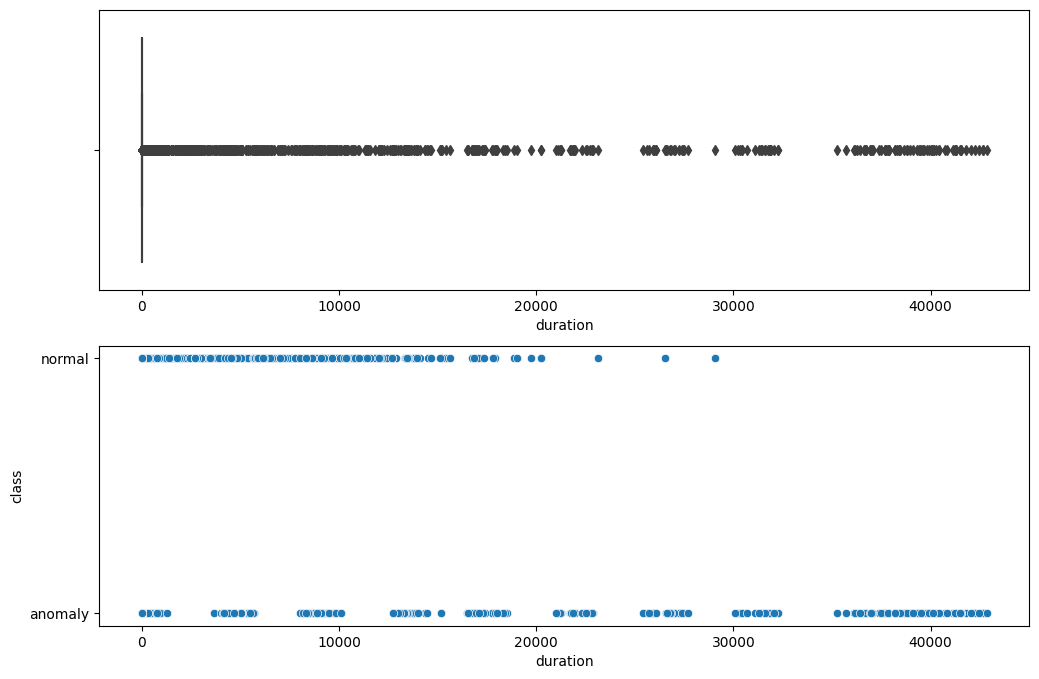

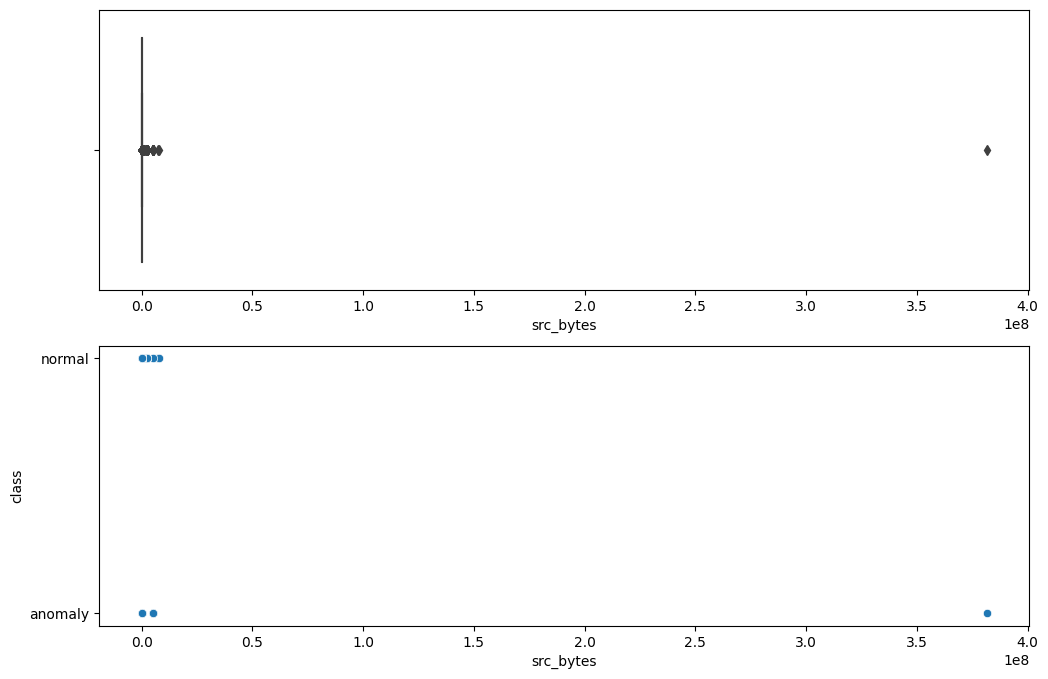

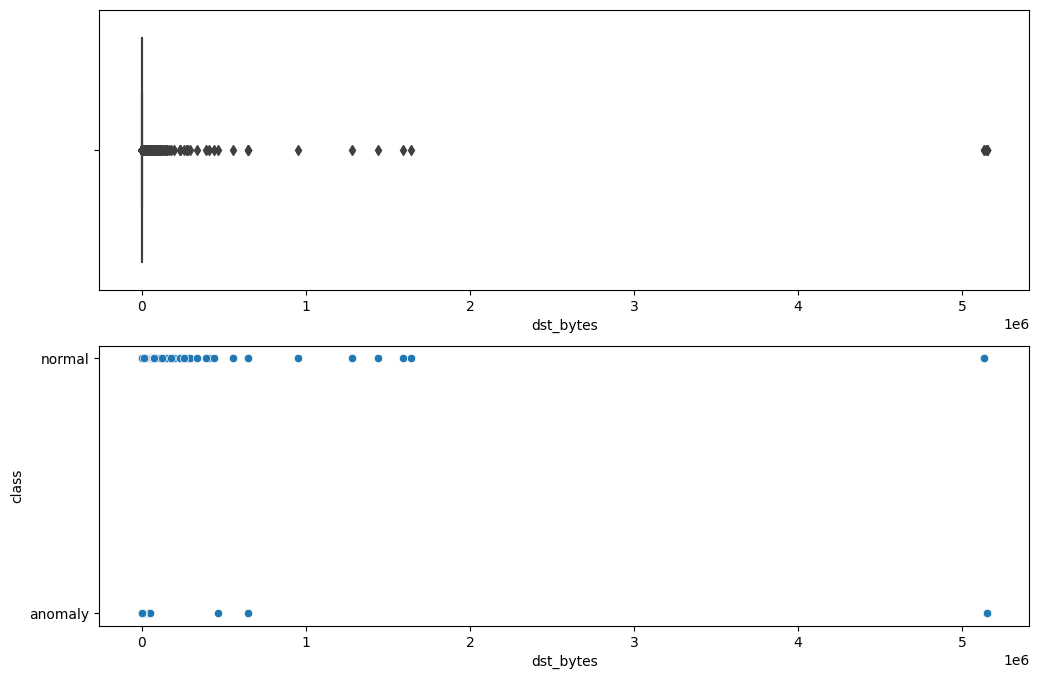

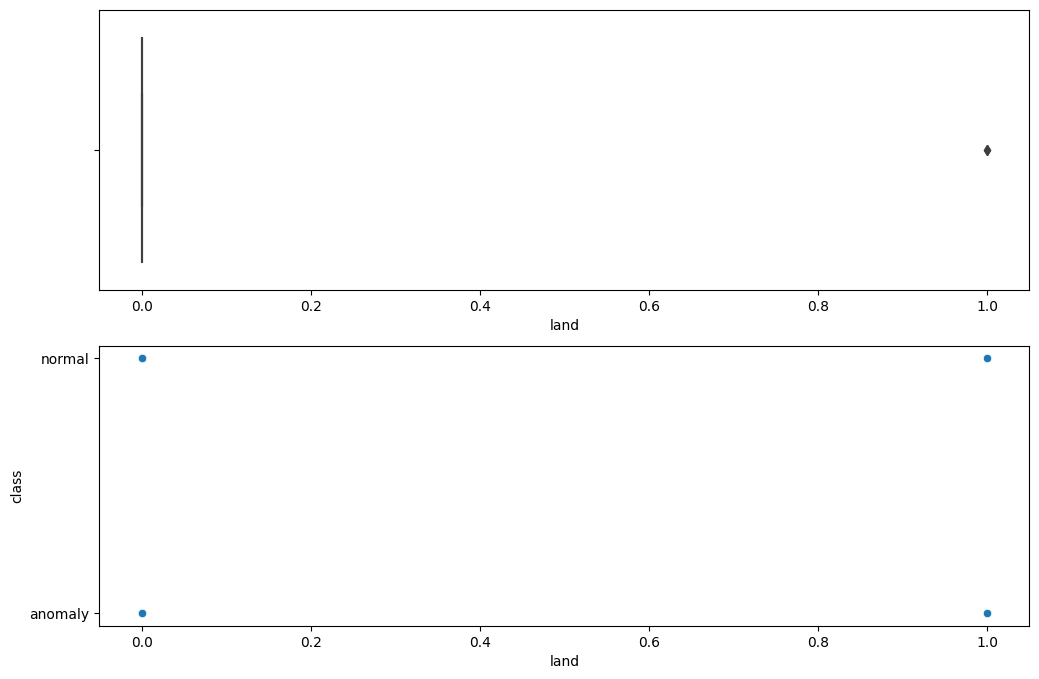

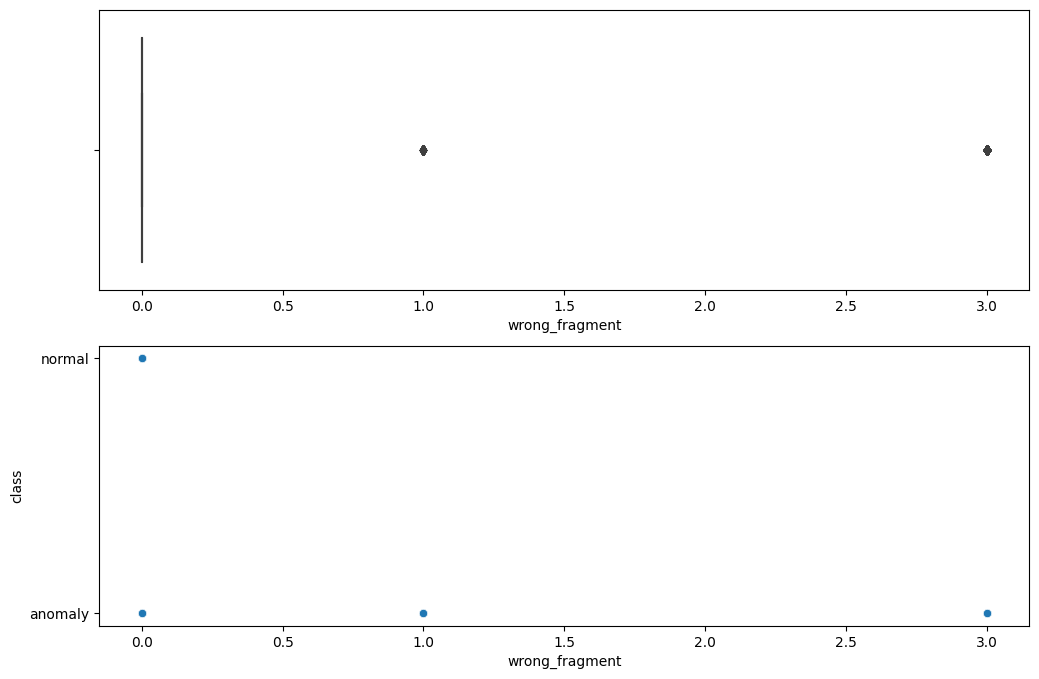

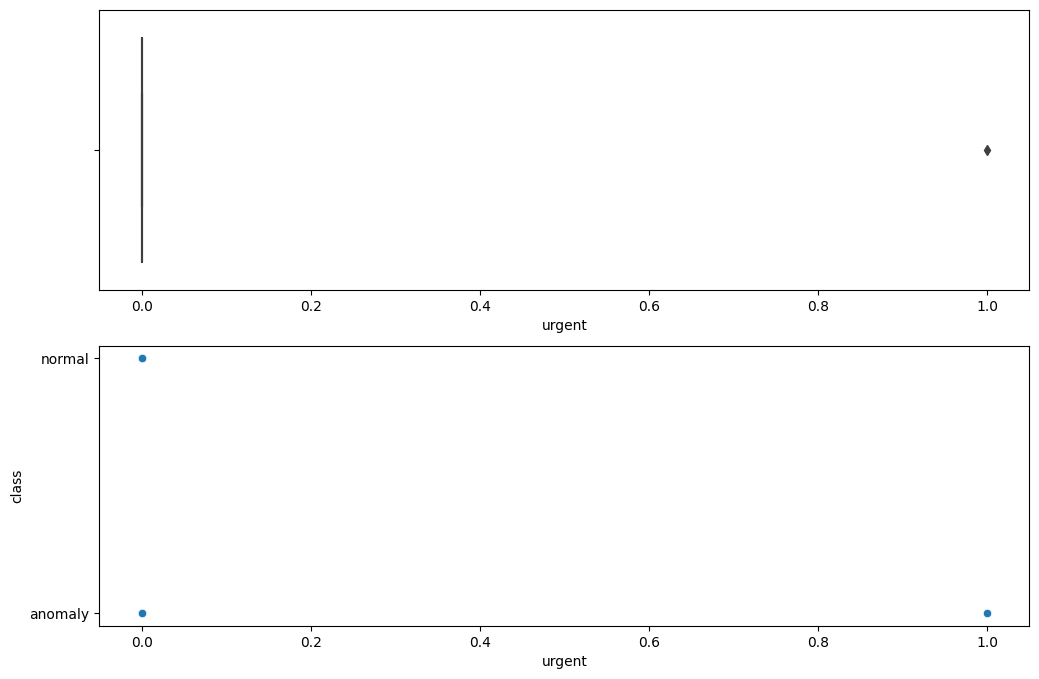

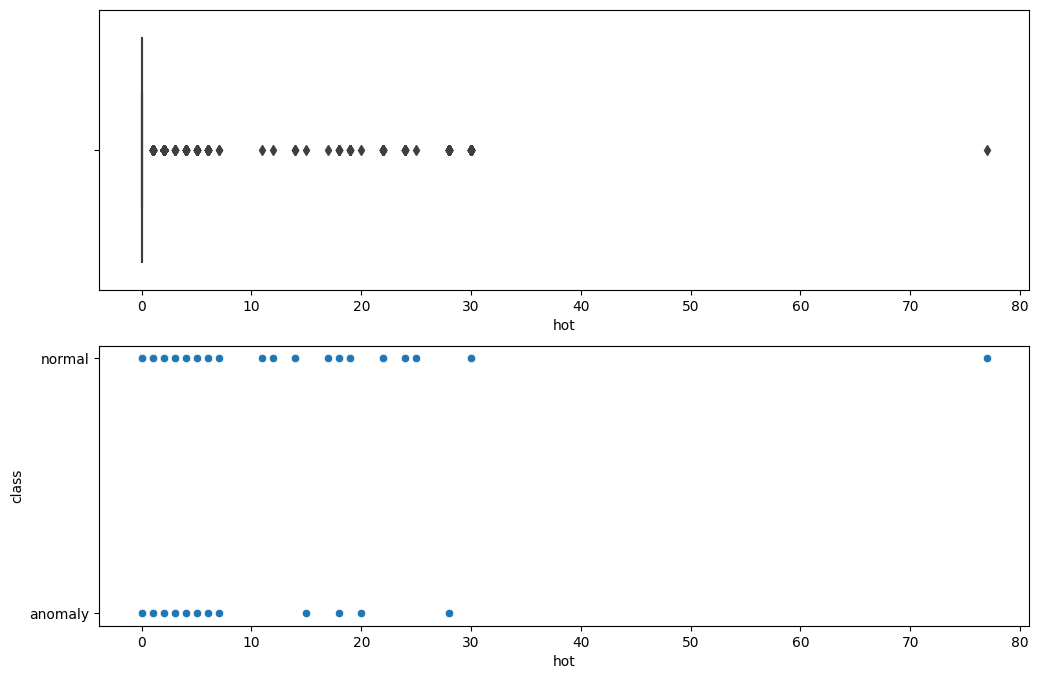

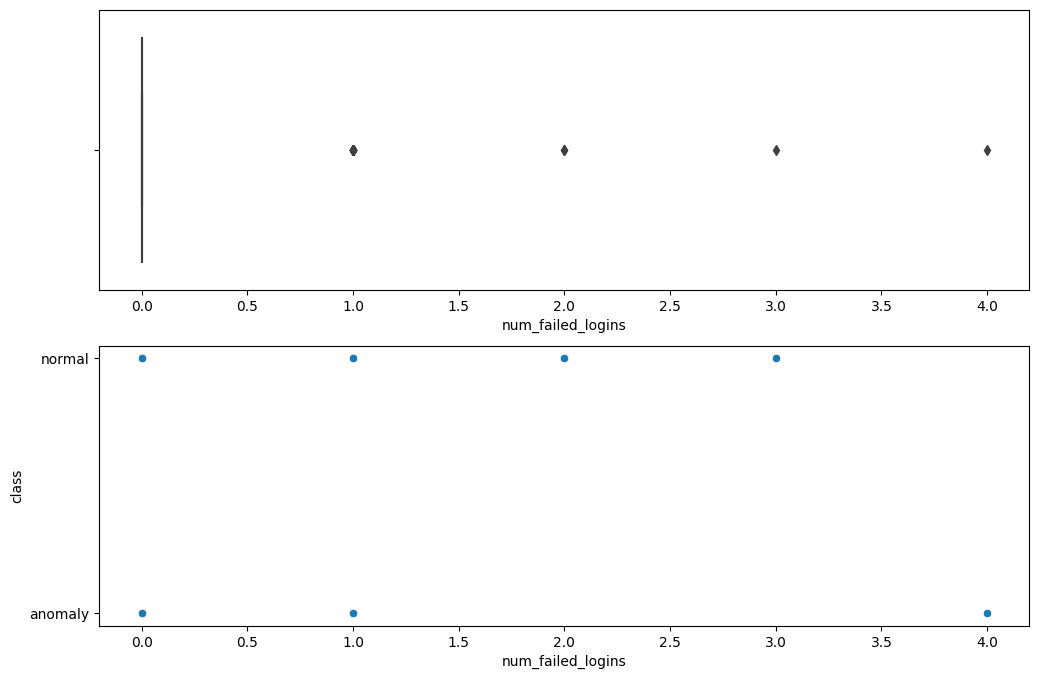

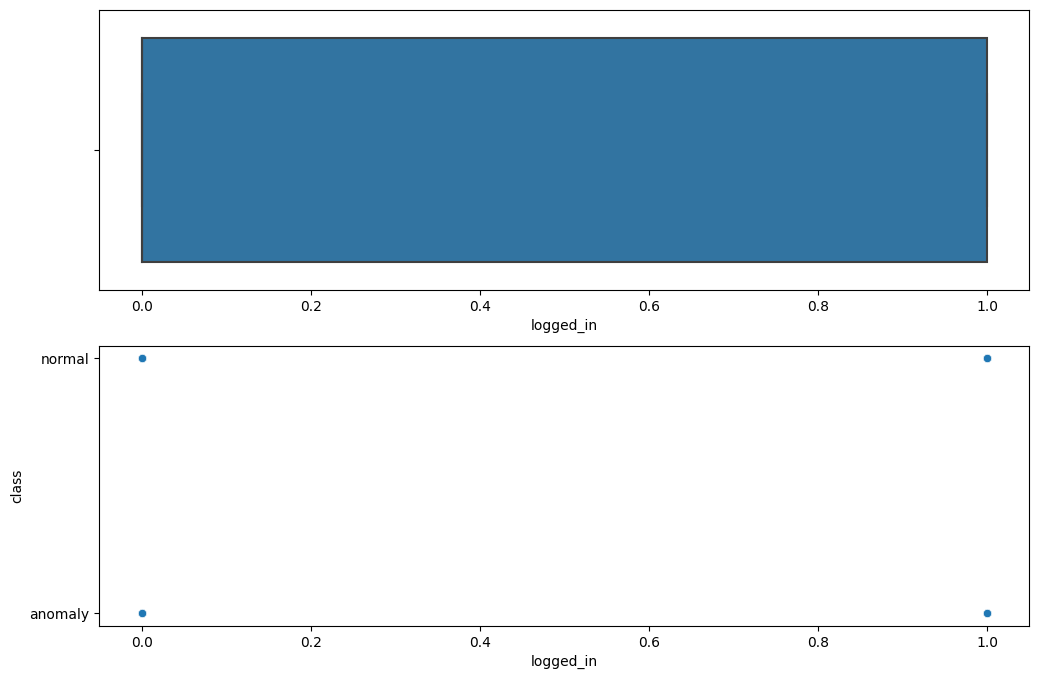

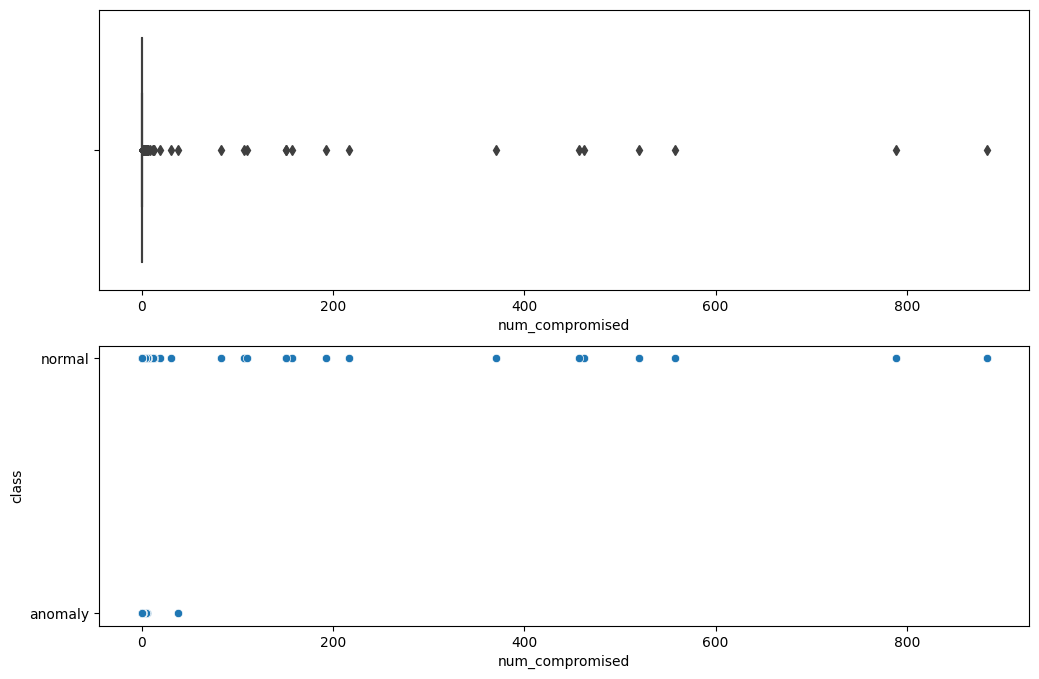

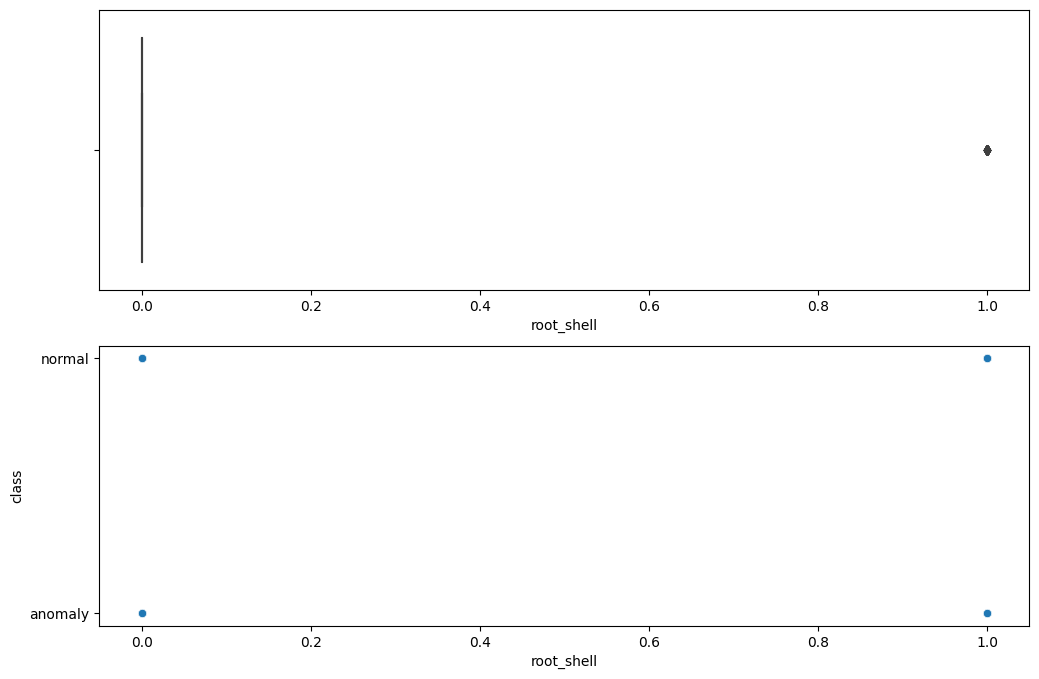

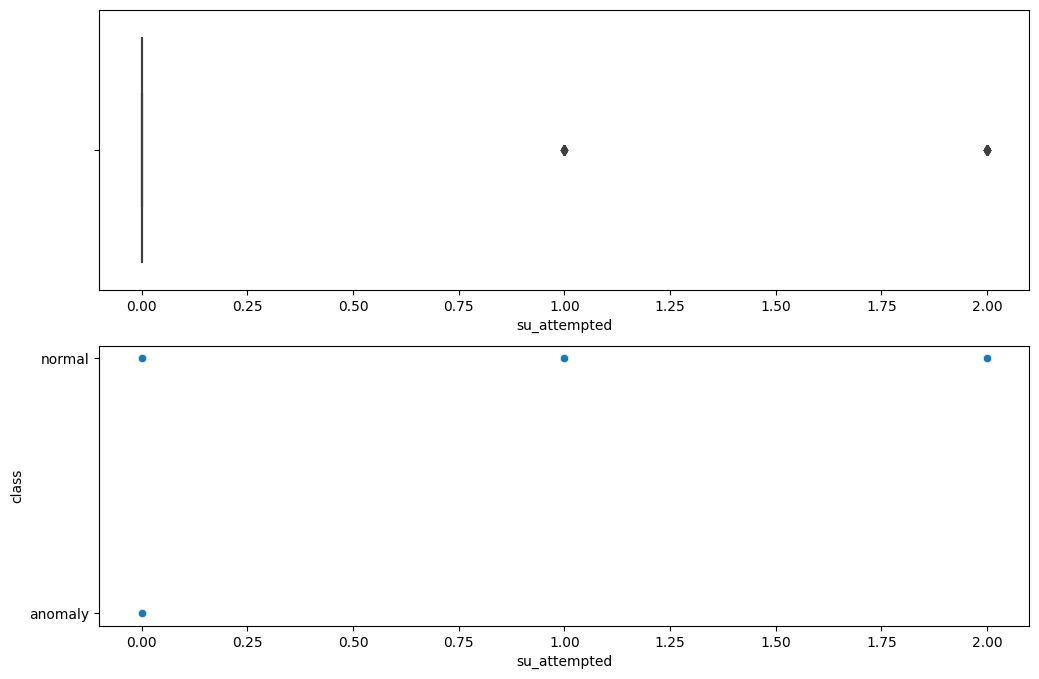

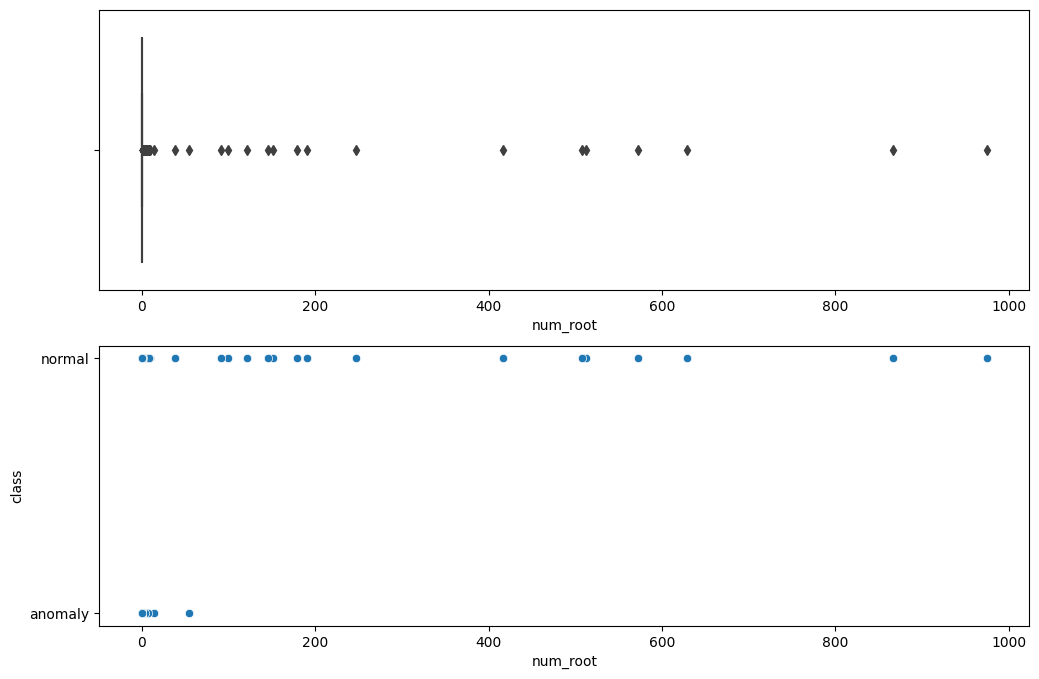

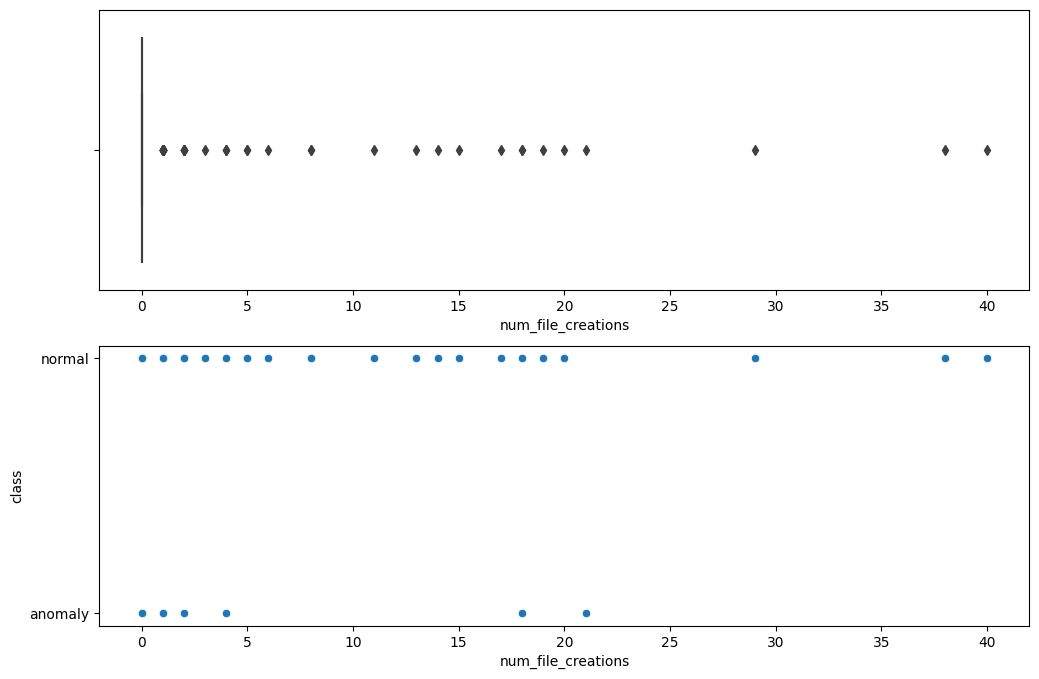

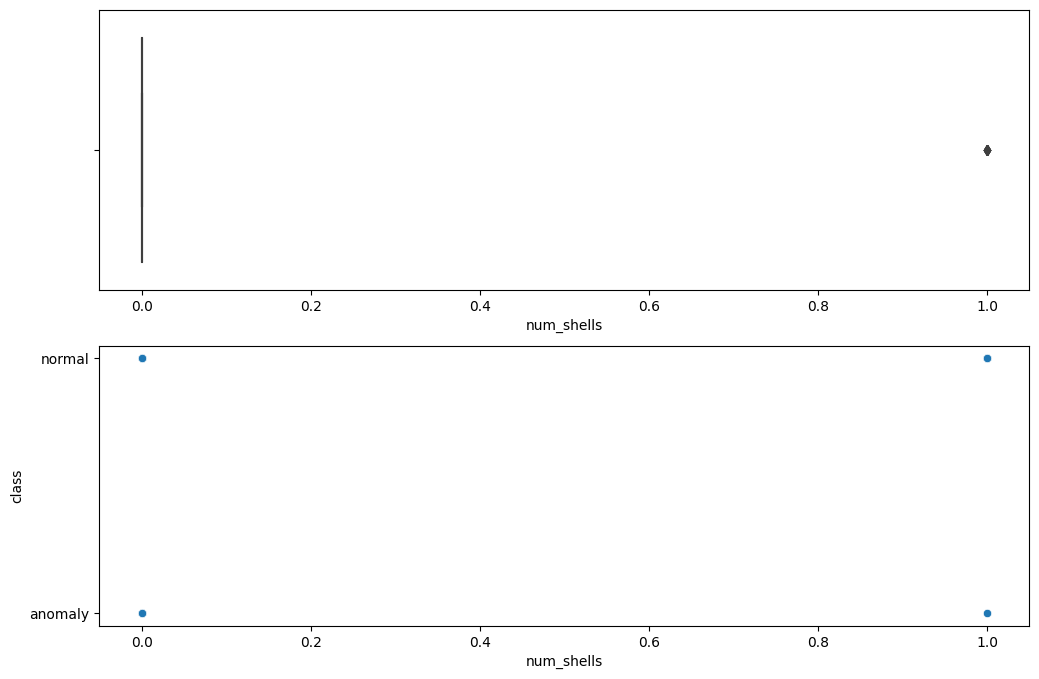

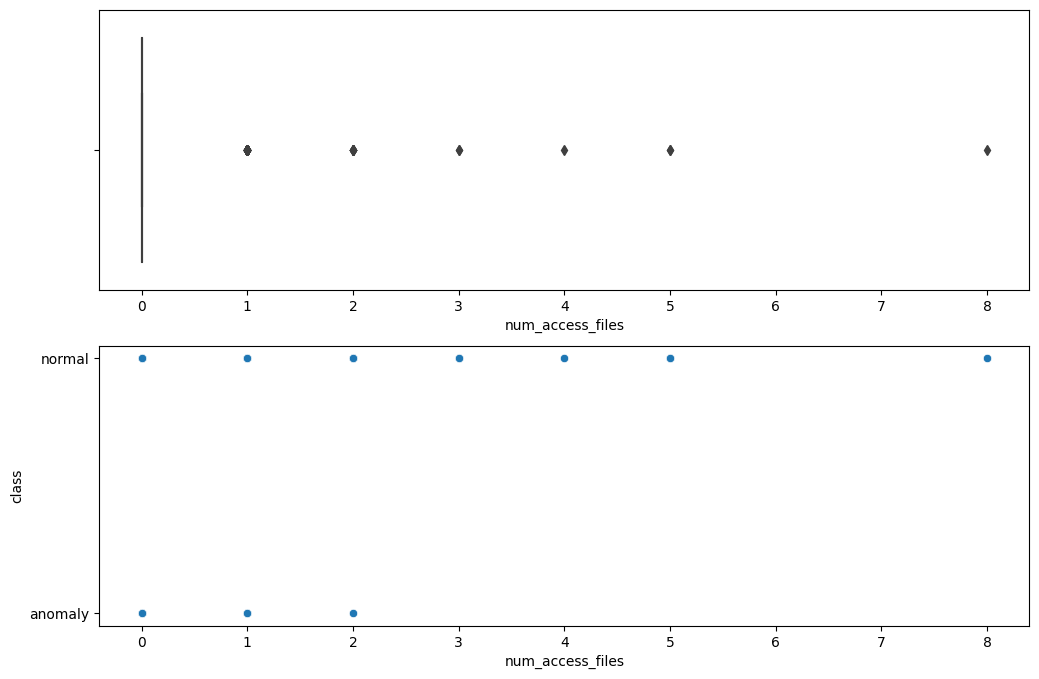

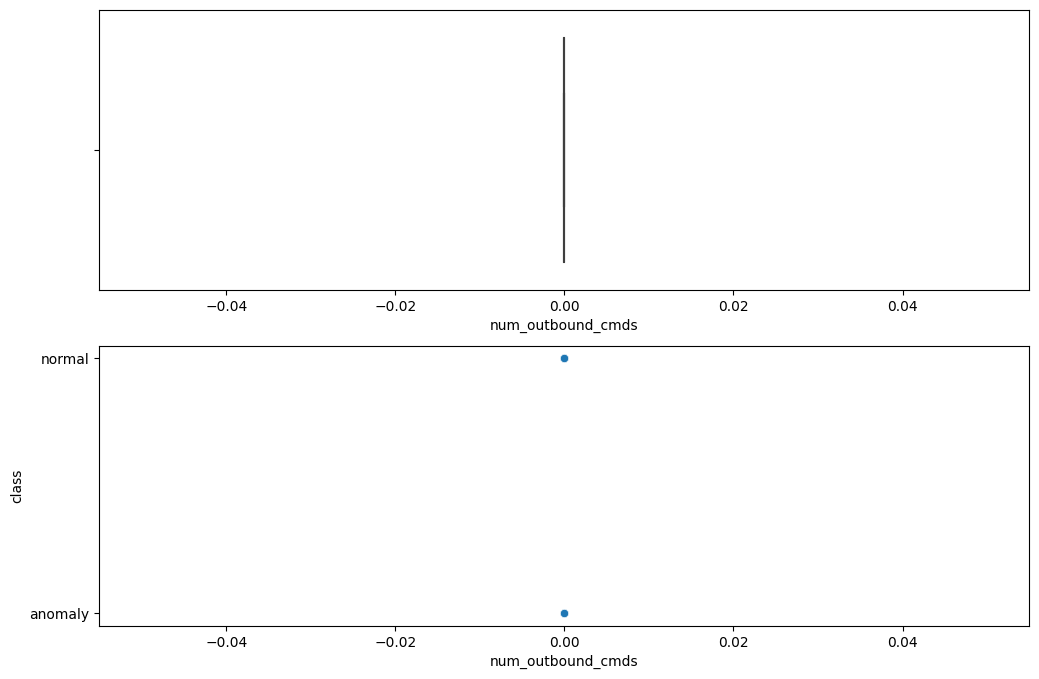

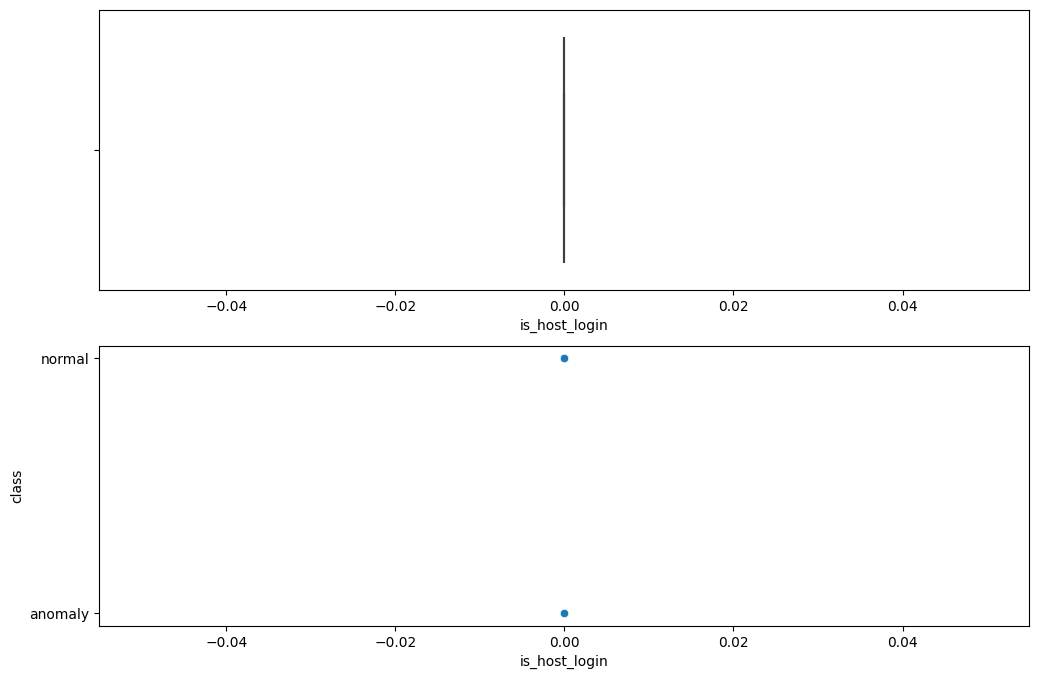

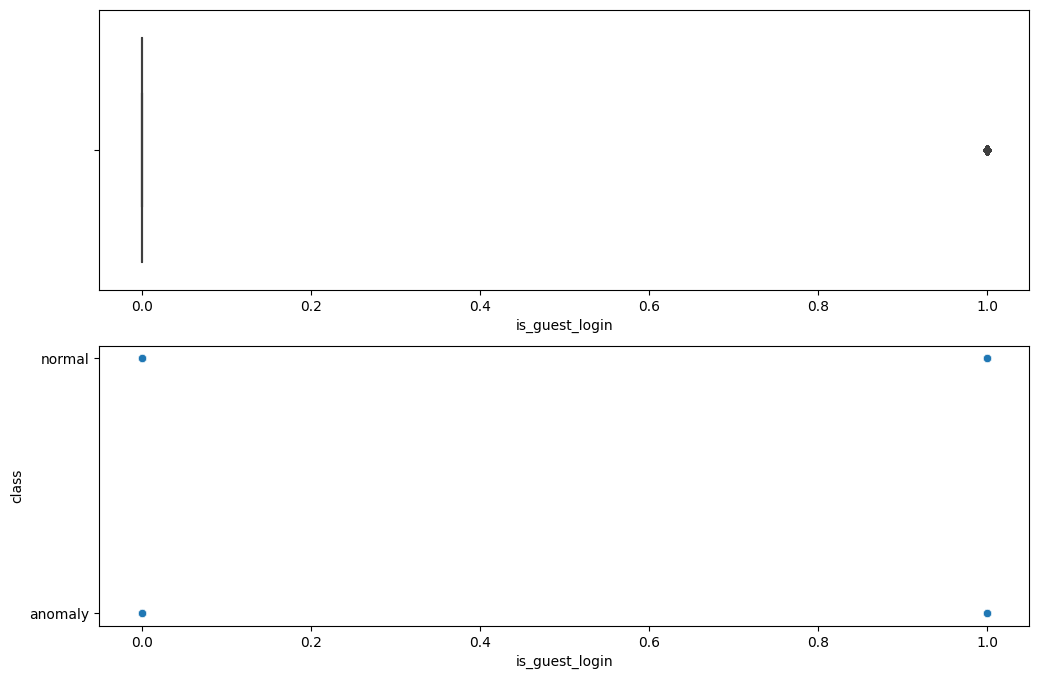

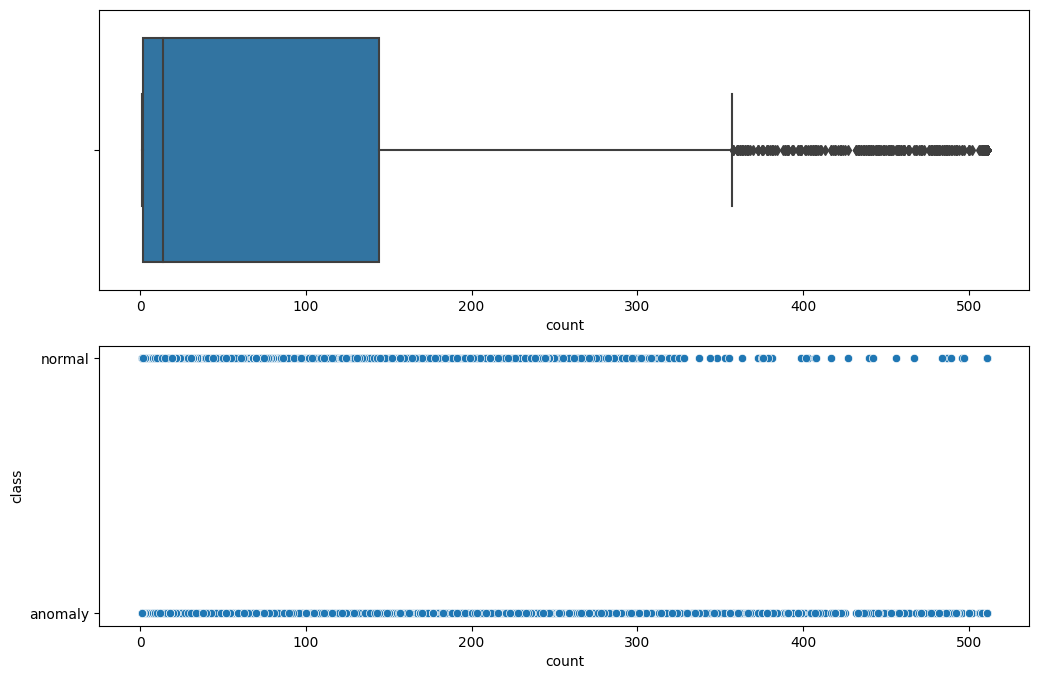

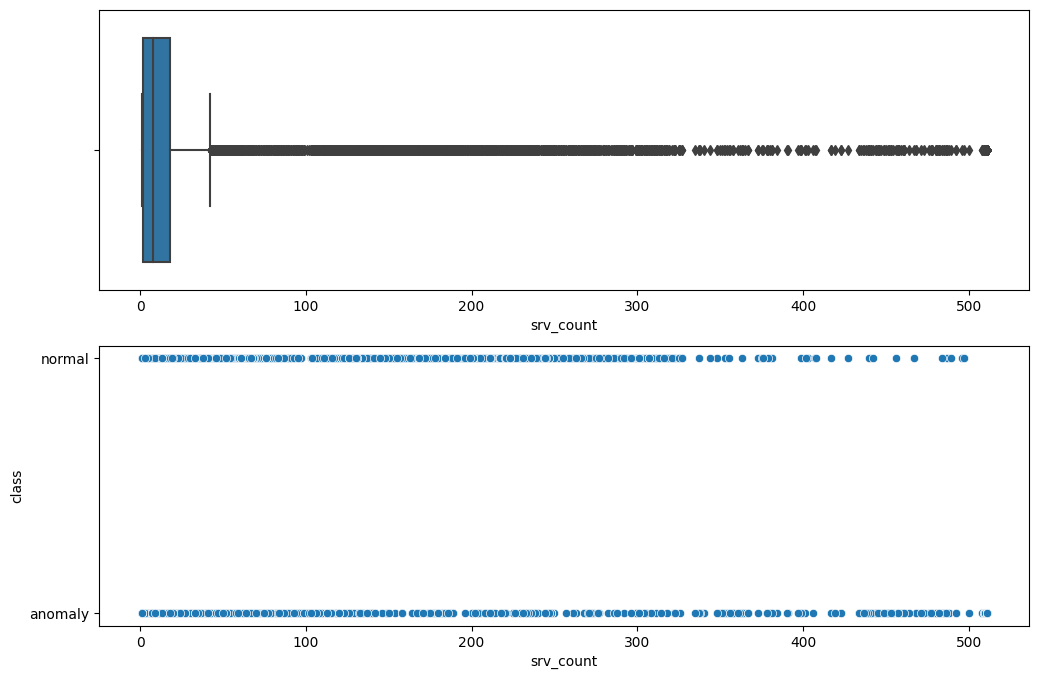

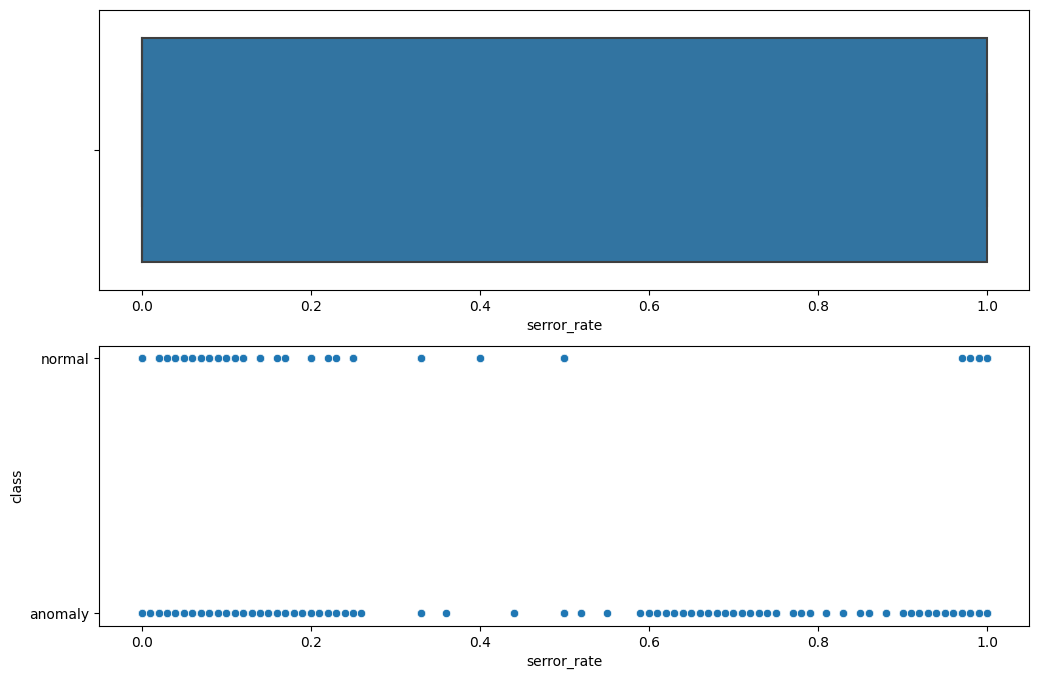

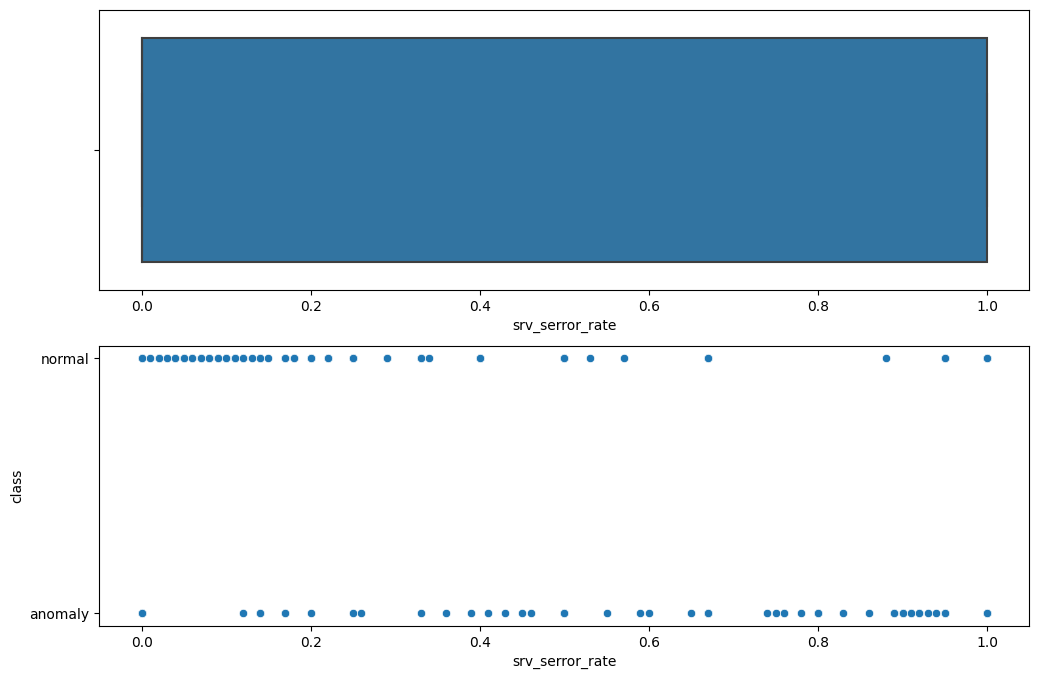

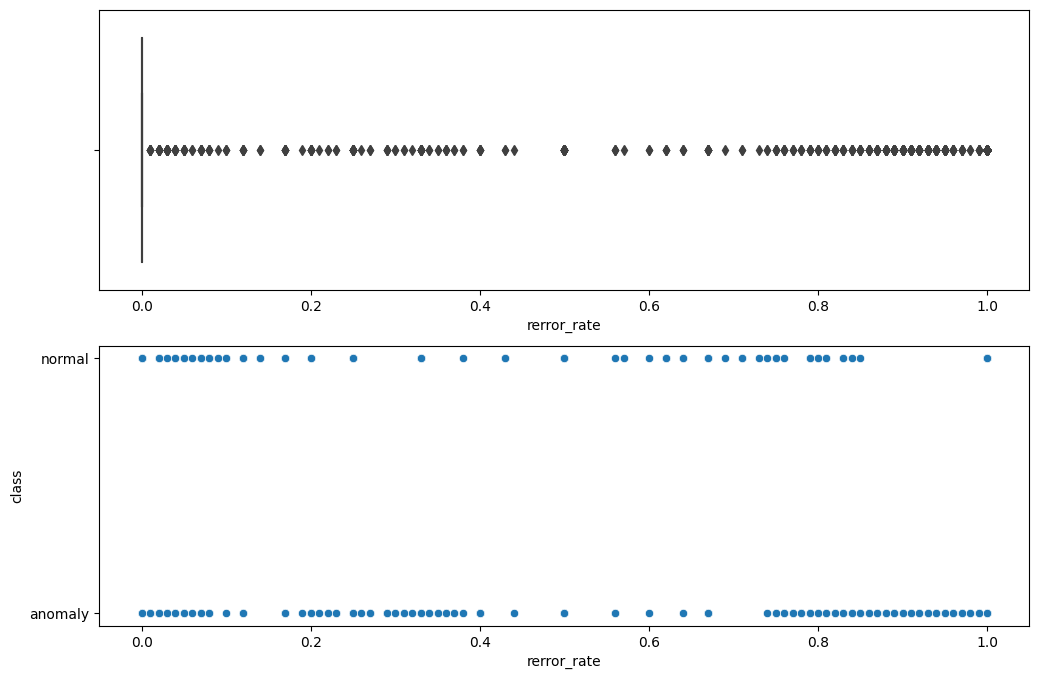

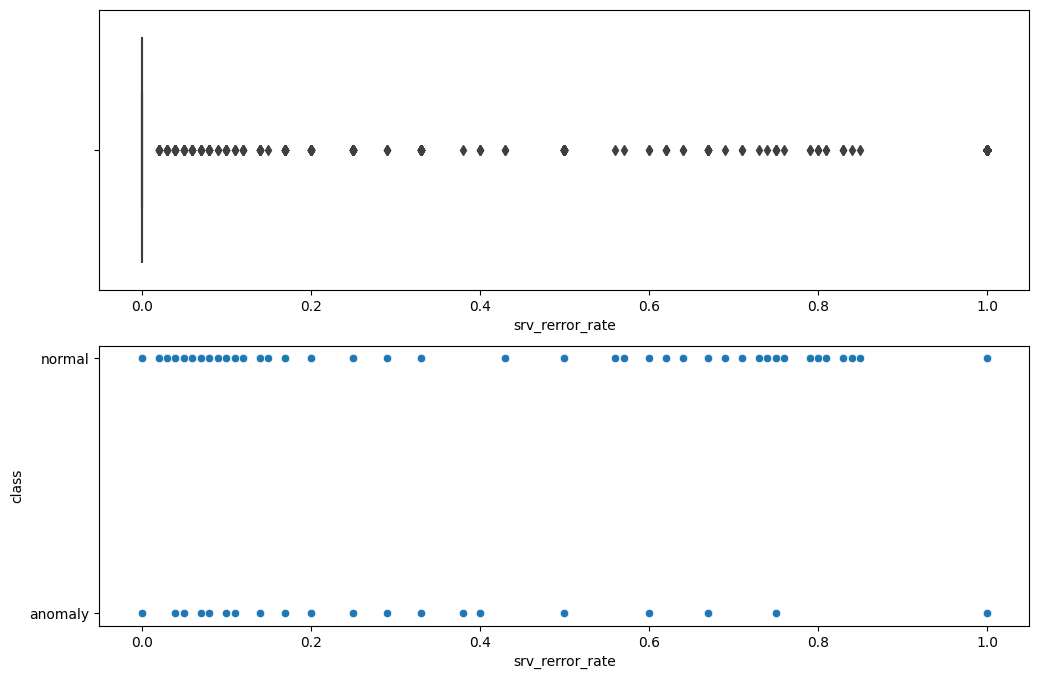

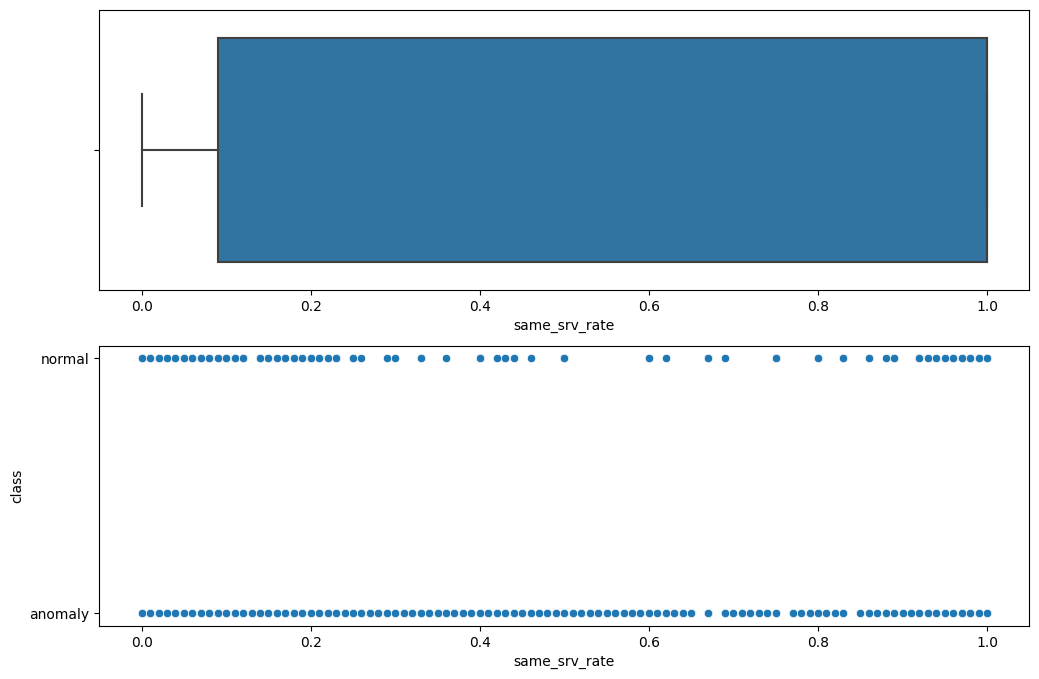

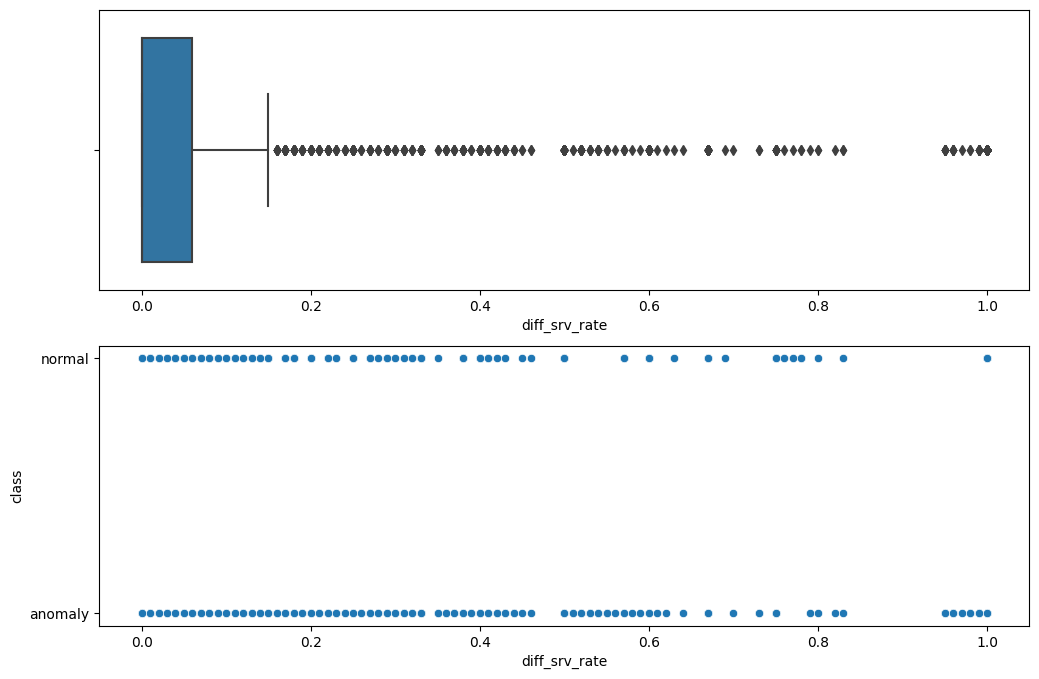

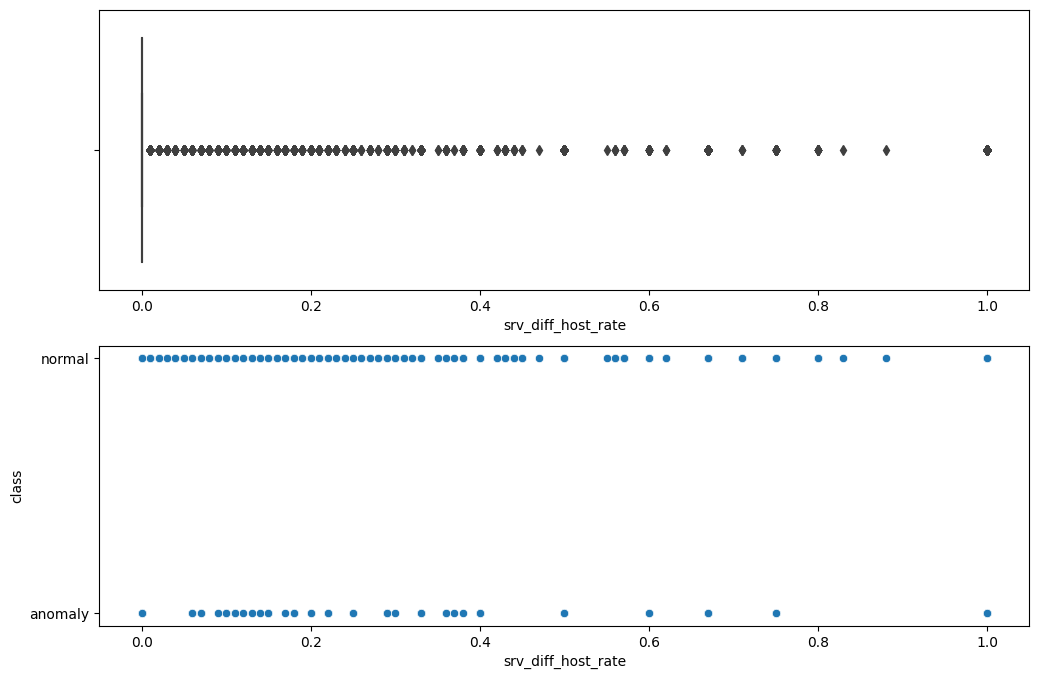

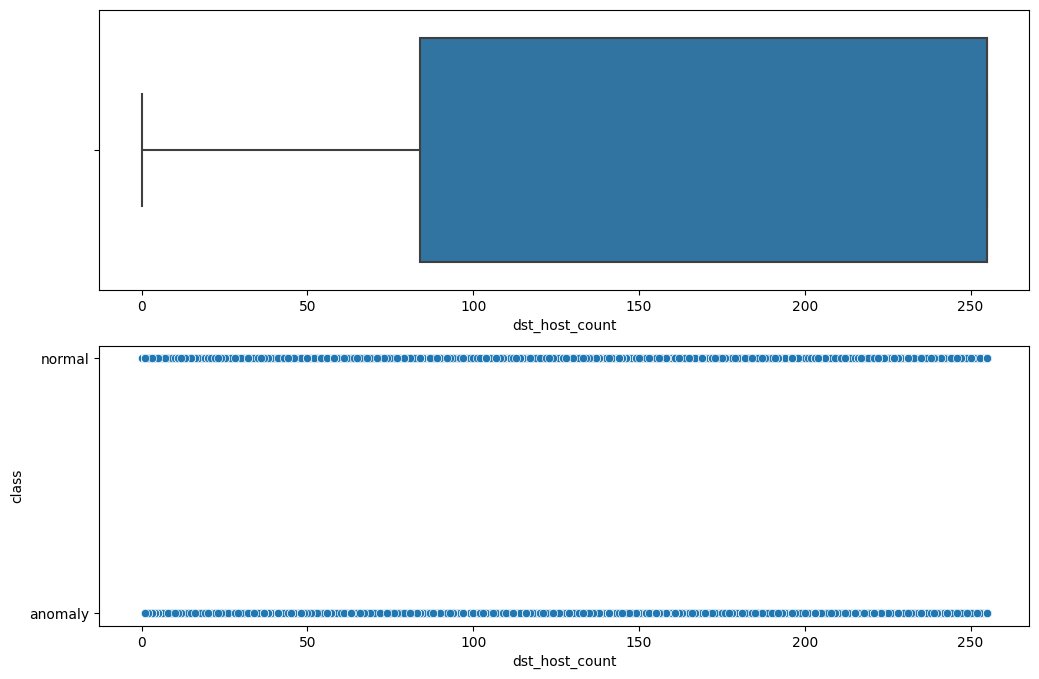

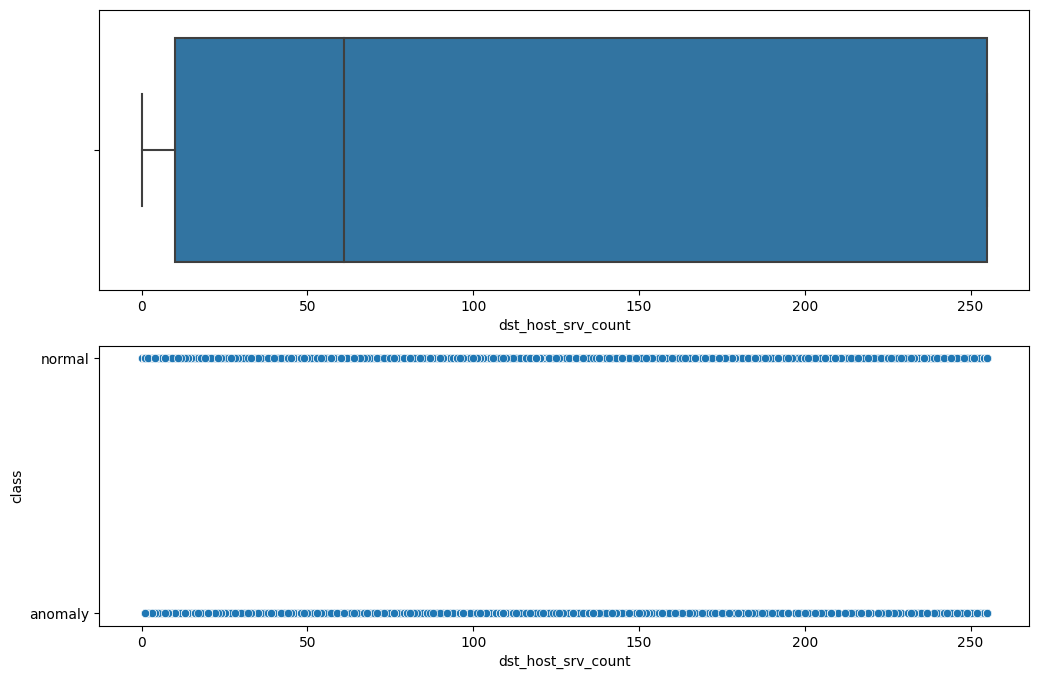

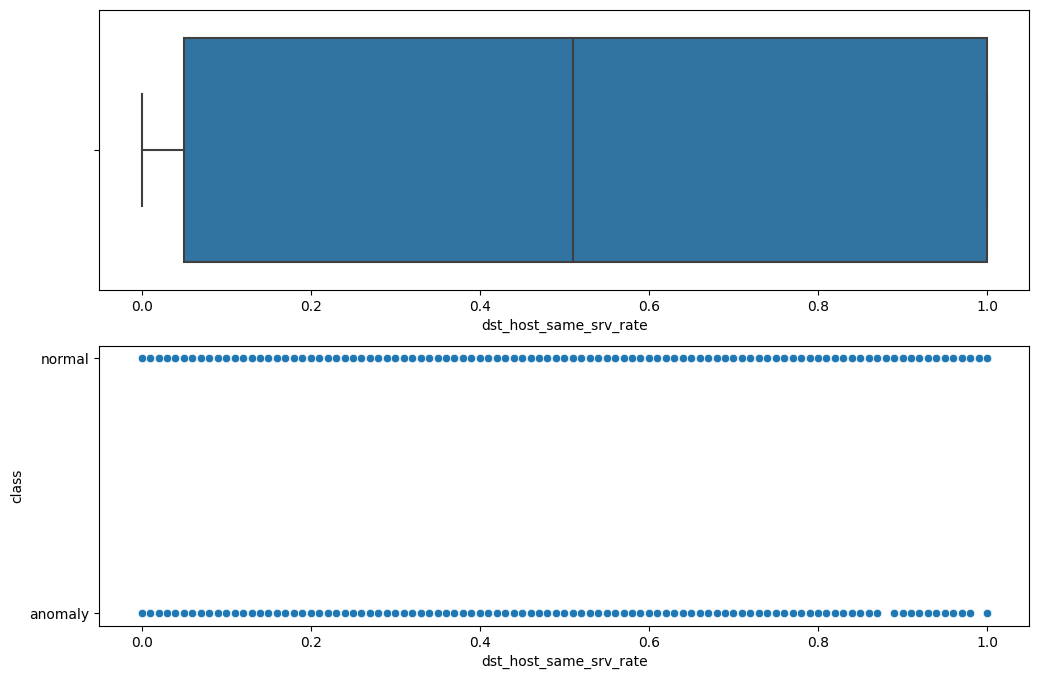

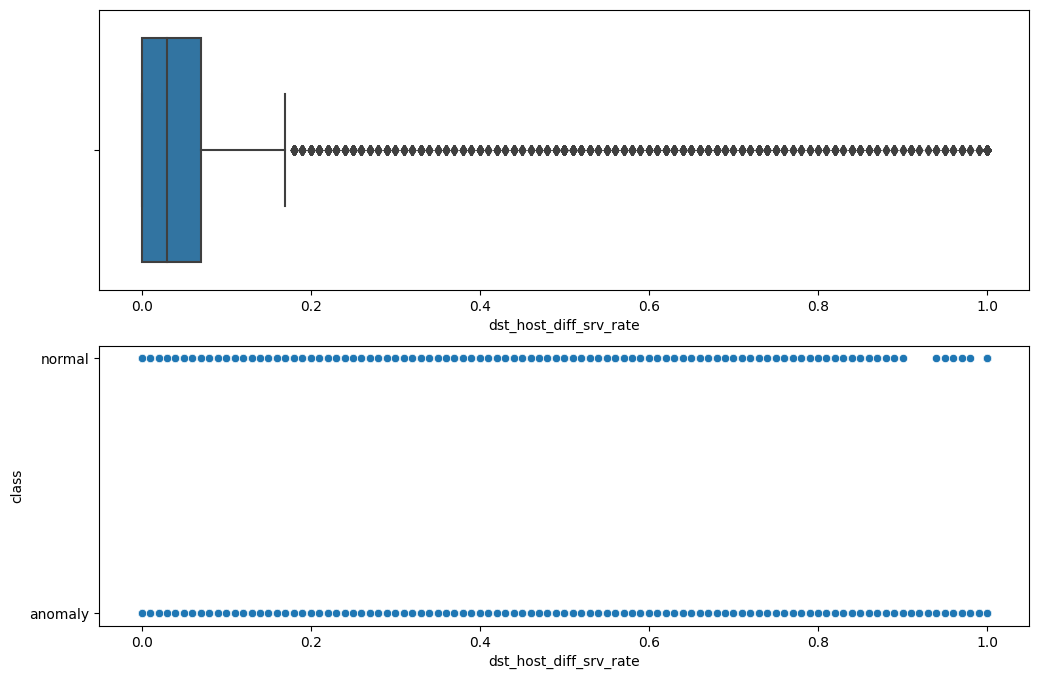

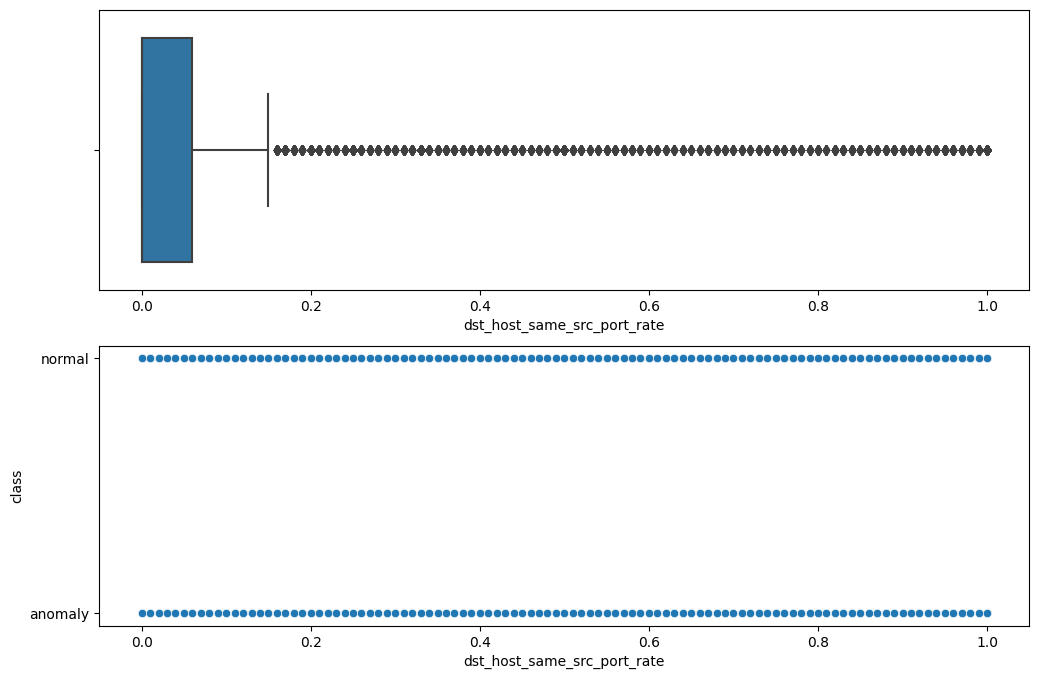

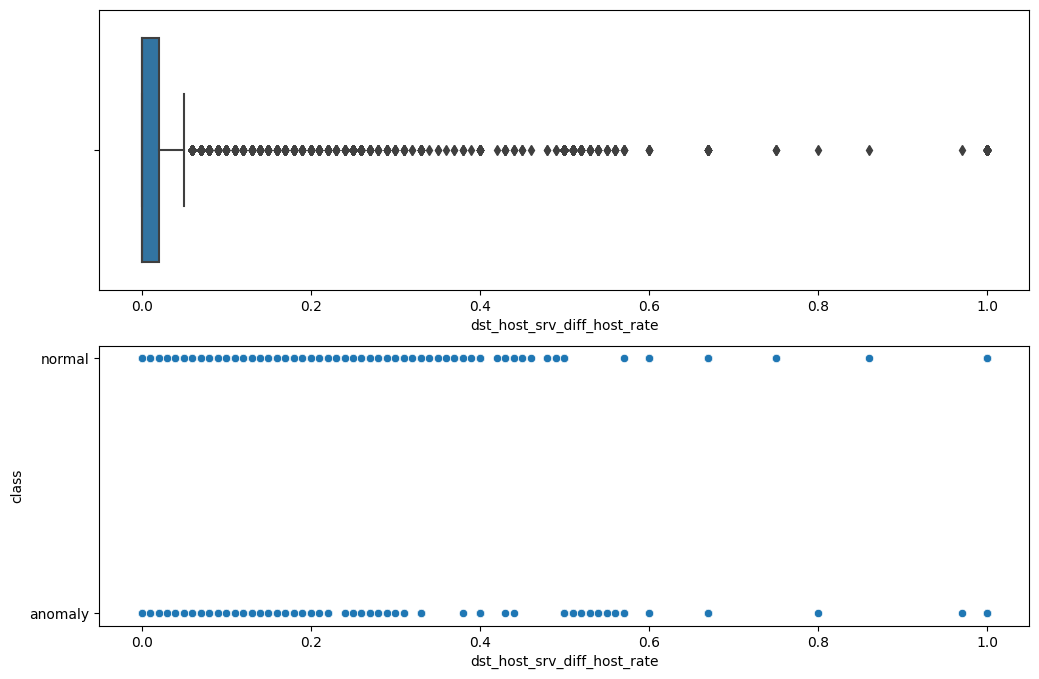

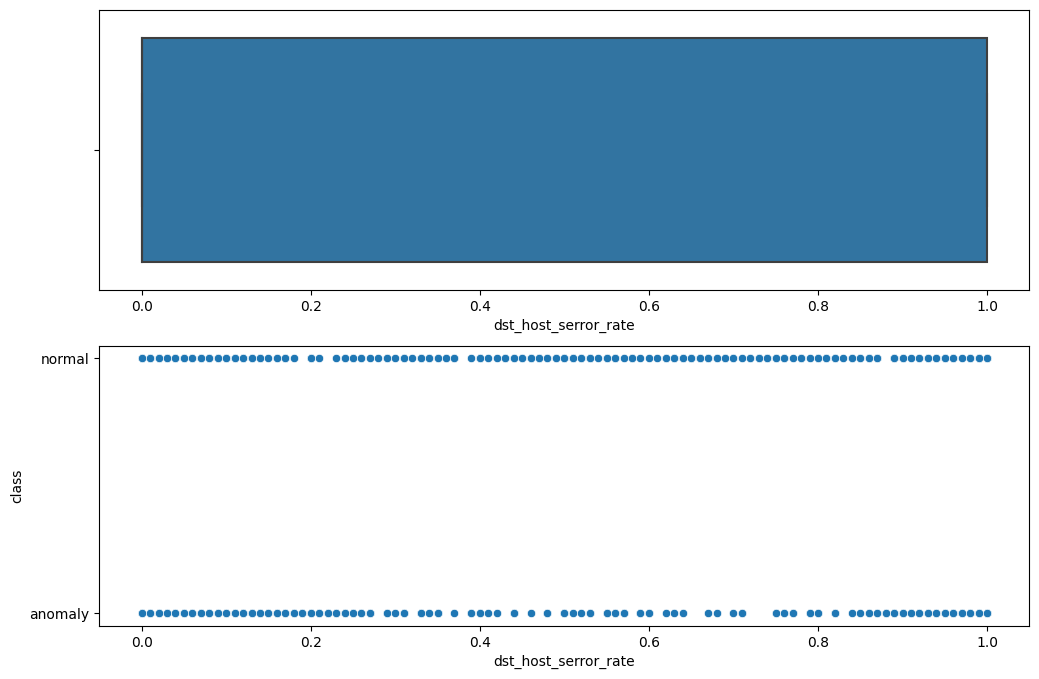

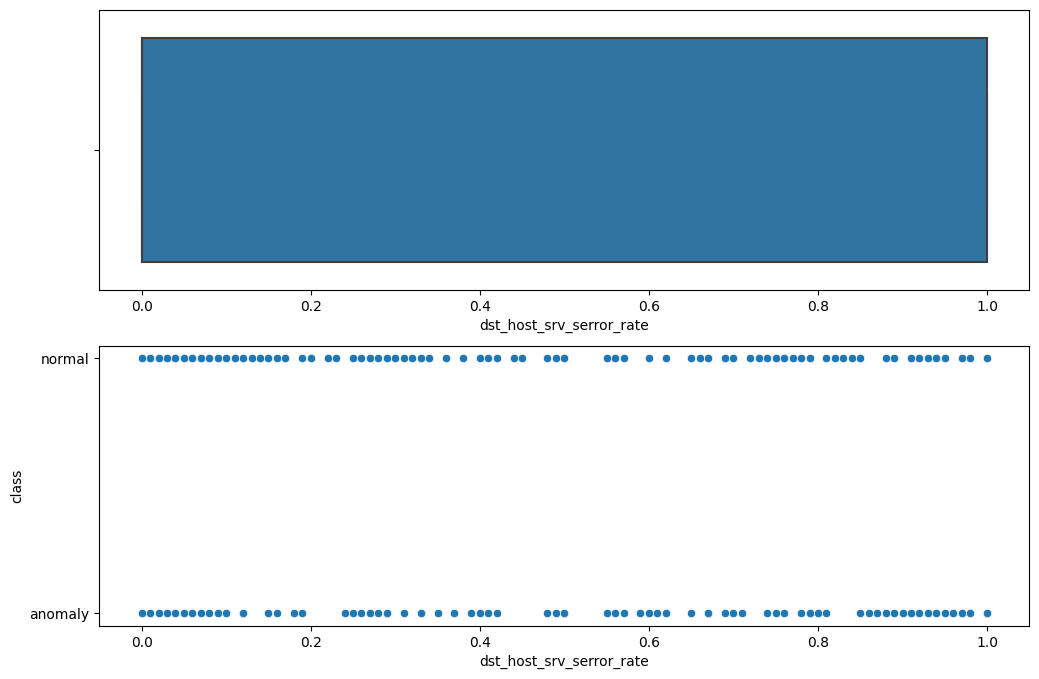

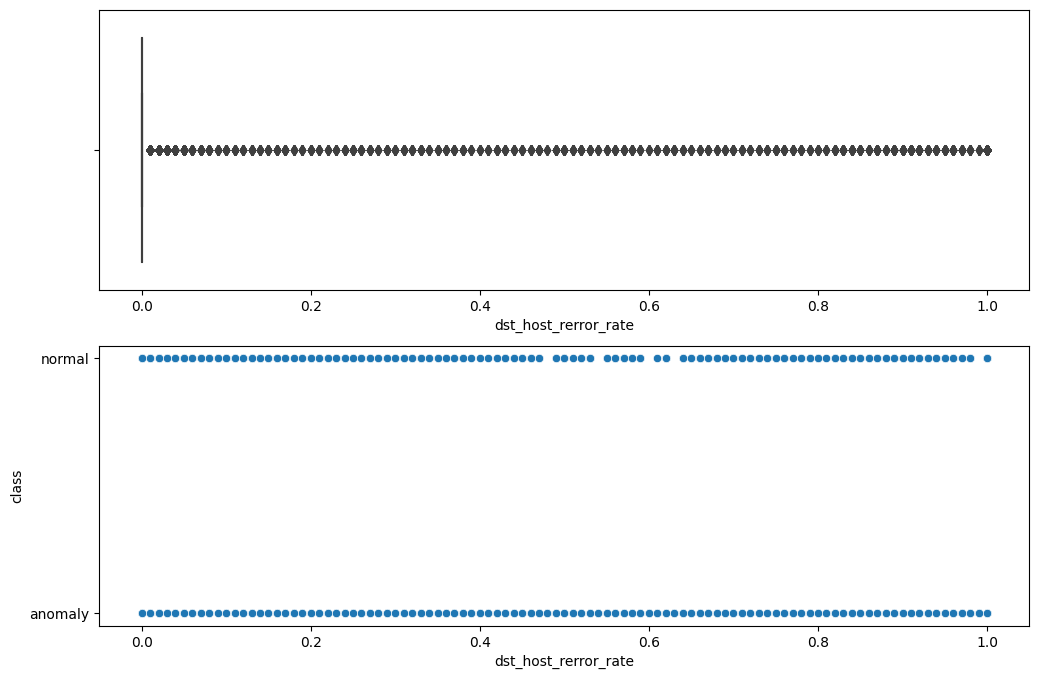

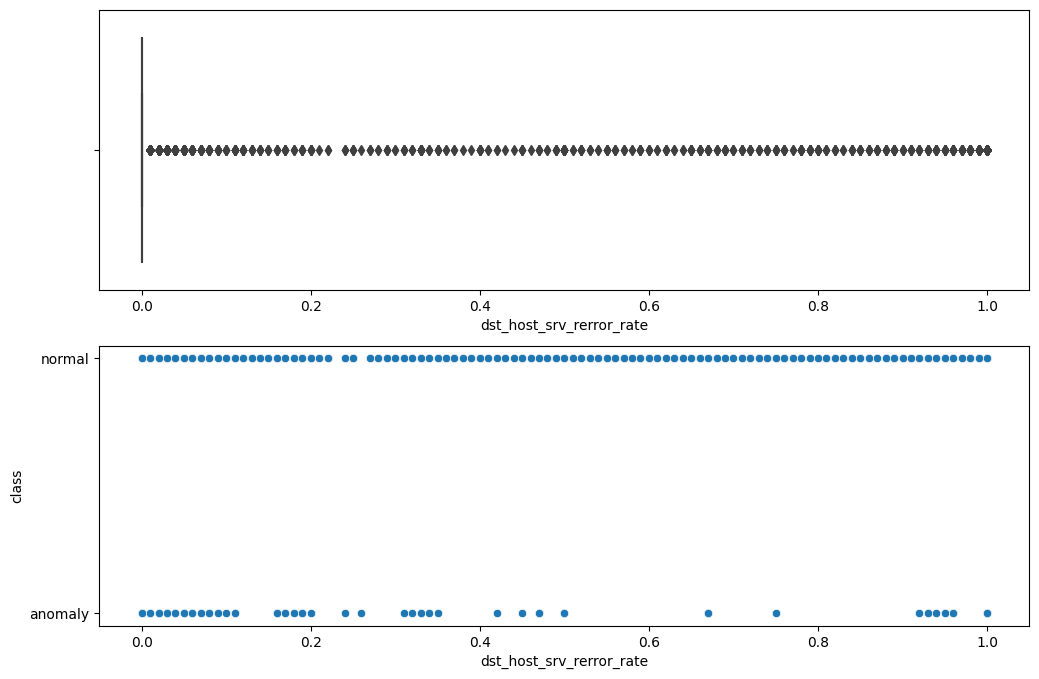

In [122]:
# Outliers 
for col in train:
    if col != 'class' and is_numeric_dtype(train[col]):
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        g1 = sns.boxplot(x=train[col], ax=ax[0])
        g2 = sns.scatterplot(data=train, x=train[col], y=train['class'], ax=ax[1])
        plt.show()


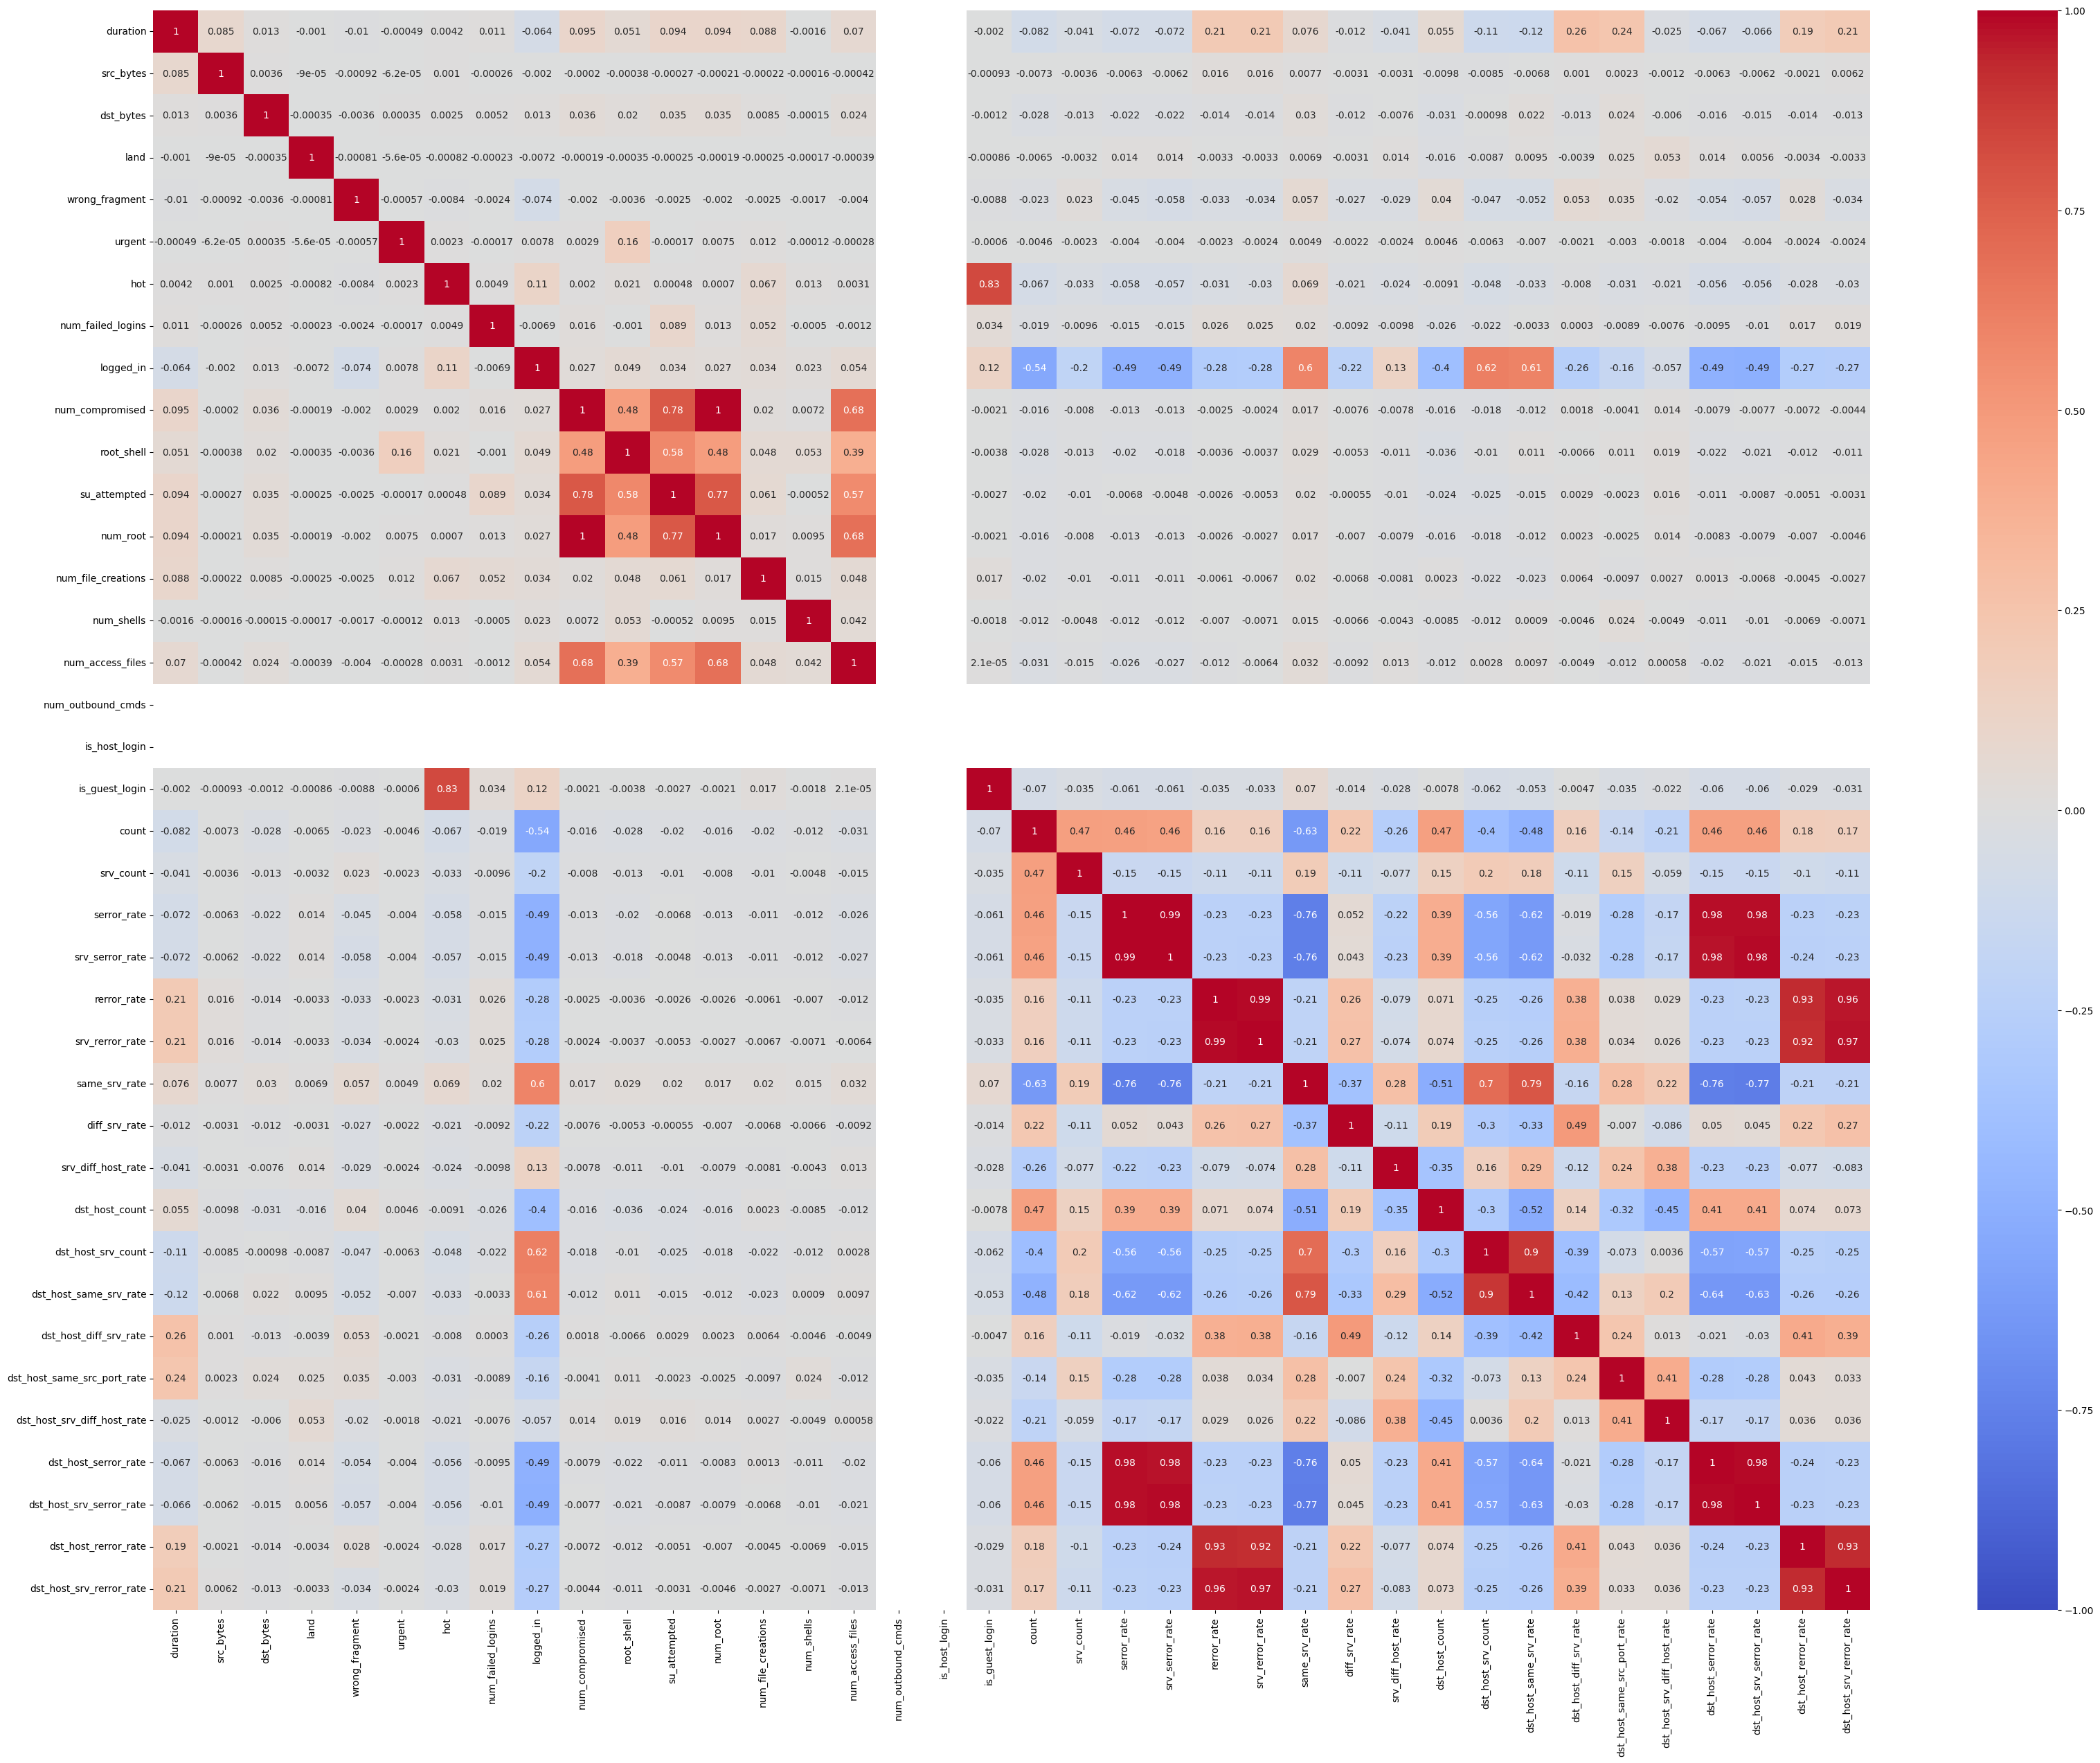

In [123]:
# Filter out only numeric columns for correlation calculation
numeric_train = train.select_dtypes(include=[np.number])

# Generate the heatmap
plt.figure(figsize=(40,30))
sns.heatmap(numeric_train.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


<Axes: xlabel='class', ylabel='count'>

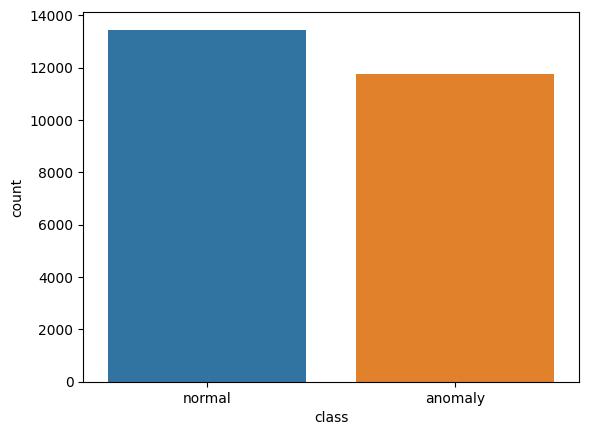

In [124]:
sns.countplot(x=train['class'])

# **Label Encoding**



In [125]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

changing object data into numeric through label encoder

In [126]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [127]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


# **Feature Selection**

In [128]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

# **Feature Selection with RFE**

In [129]:
from sklearn.feature_selection import RFE

In [130]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [131]:
# Get the selected features
selected_features = [feature for i, feature in enumerate(X_train.columns) if rfe.support_[i]]


In [132]:
X_train = X_train[selected_features]

# **Split and scale data**

In [133]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [134]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

# **Feature Preparation for Isolation Forest**

In [135]:
X_train_if = pd.DataFrame(X_train, columns=selected_features)  # Use the features selected earlier


In [136]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_if = scale.fit_transform(X_train_if)


# **Training of Isolation Forest Model**

In [137]:

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train_if)

y_pred = iso_forest.predict(X_train_if)
y_pred_if = iso_forest.predict(X_train_if)

In [138]:
# Calculate anomaly detection metrics
anomalies_train = np.sum(y_pred_if == -1)
normal_train = np.sum(y_pred_if == 1)

# **Results**

In [139]:
# Anomalies are labeled as -1, and normal data as 1
anomalies = np.where(y_pred == -1)[0]
normal = np.where(y_pred == 1)[0]

# Print out the number of anomalies detected
print(f"Number of anomalies detected: {len(anomalies)}")
print(f"Number of normal data points: {len(normal)}")


Number of anomalies detected: 1260
Number of normal data points: 23932


# **Visualization**

# **Visualize Anomaly Detection Results**

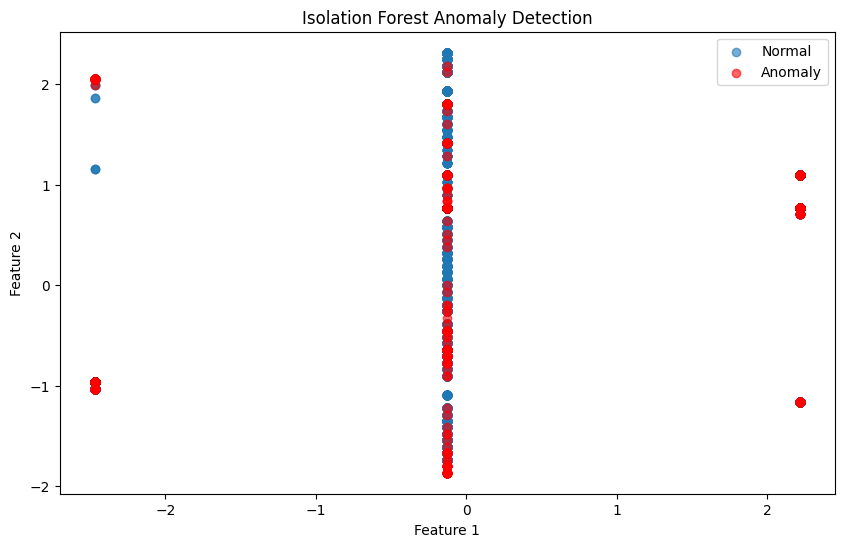

In [140]:
def plot_anomalies(X, y_pred, title='Anomaly Detection'):
    plt.figure(figsize=(10, 6))
    # Normal data points
    plt.scatter(X[y_pred == 1][:, 0], X[y_pred == 1][:, 1], label='Normal', alpha=0.6)
    # Anomalies
    plt.scatter(X[y_pred == -1][:, 0], X[y_pred == -1][:, 1], label='Anomaly', alpha=0.6, color='red')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Plotting the anomalies
plot_anomalies(X_train_if, y_pred_if, title='Isolation Forest Anomaly Detection')


# **Visualize the Anomaly Scores**

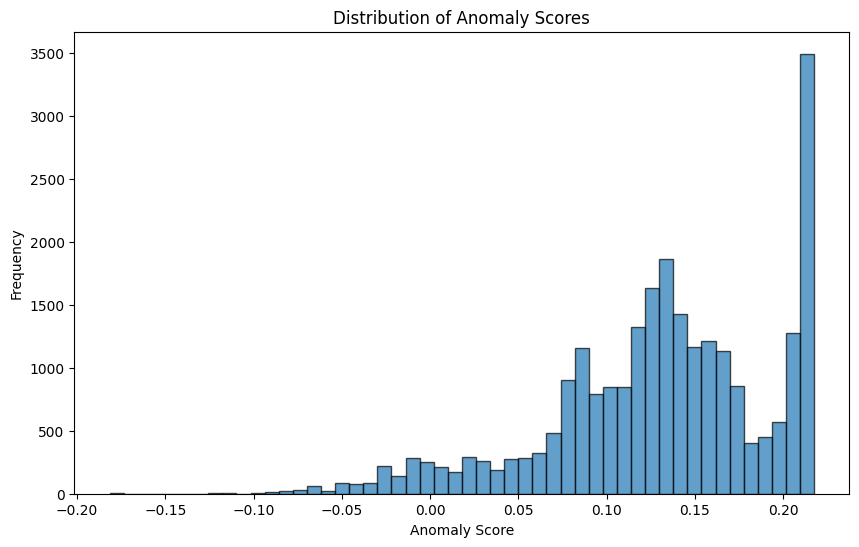

In [141]:
anomaly_scores = iso_forest.decision_function(X_train_if)

plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.show()


# **Comparison with others models which are classifiers**

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
import itertools
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tabulate import tabulate

# **K Nearest Neighbors (KNN) classification model**

In [143]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [144]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.980418100026462], datetime_start=datetime.datetime(2024, 8, 25, 17, 21, 38, 229059), datetime_complete=datetime.datetime(2024, 8, 25, 17, 21, 39, 191670), params={'KNN_n_neighbors': 14}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [145]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9807190654417602
Test Score: 0.980418100026462


# **Logistic Regression Model**

In [146]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [147]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9287739593966202
Test Score: 0.9231278115903678


# **Decision Tree Classifier**

In [148]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [149]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=6, state=TrialState.COMPLETE, values=[0.9957660756813972], datetime_start=datetime.datetime(2024, 8, 25, 17, 21, 42, 669830), datetime_complete=datetime.datetime(2024, 8, 25, 17, 21, 42, 706101), params={'dt_max_depth': 22, 'dt_max_features': 8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=6, value=None)


In [150]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 1.0
Test Score: 0.9952368351415718


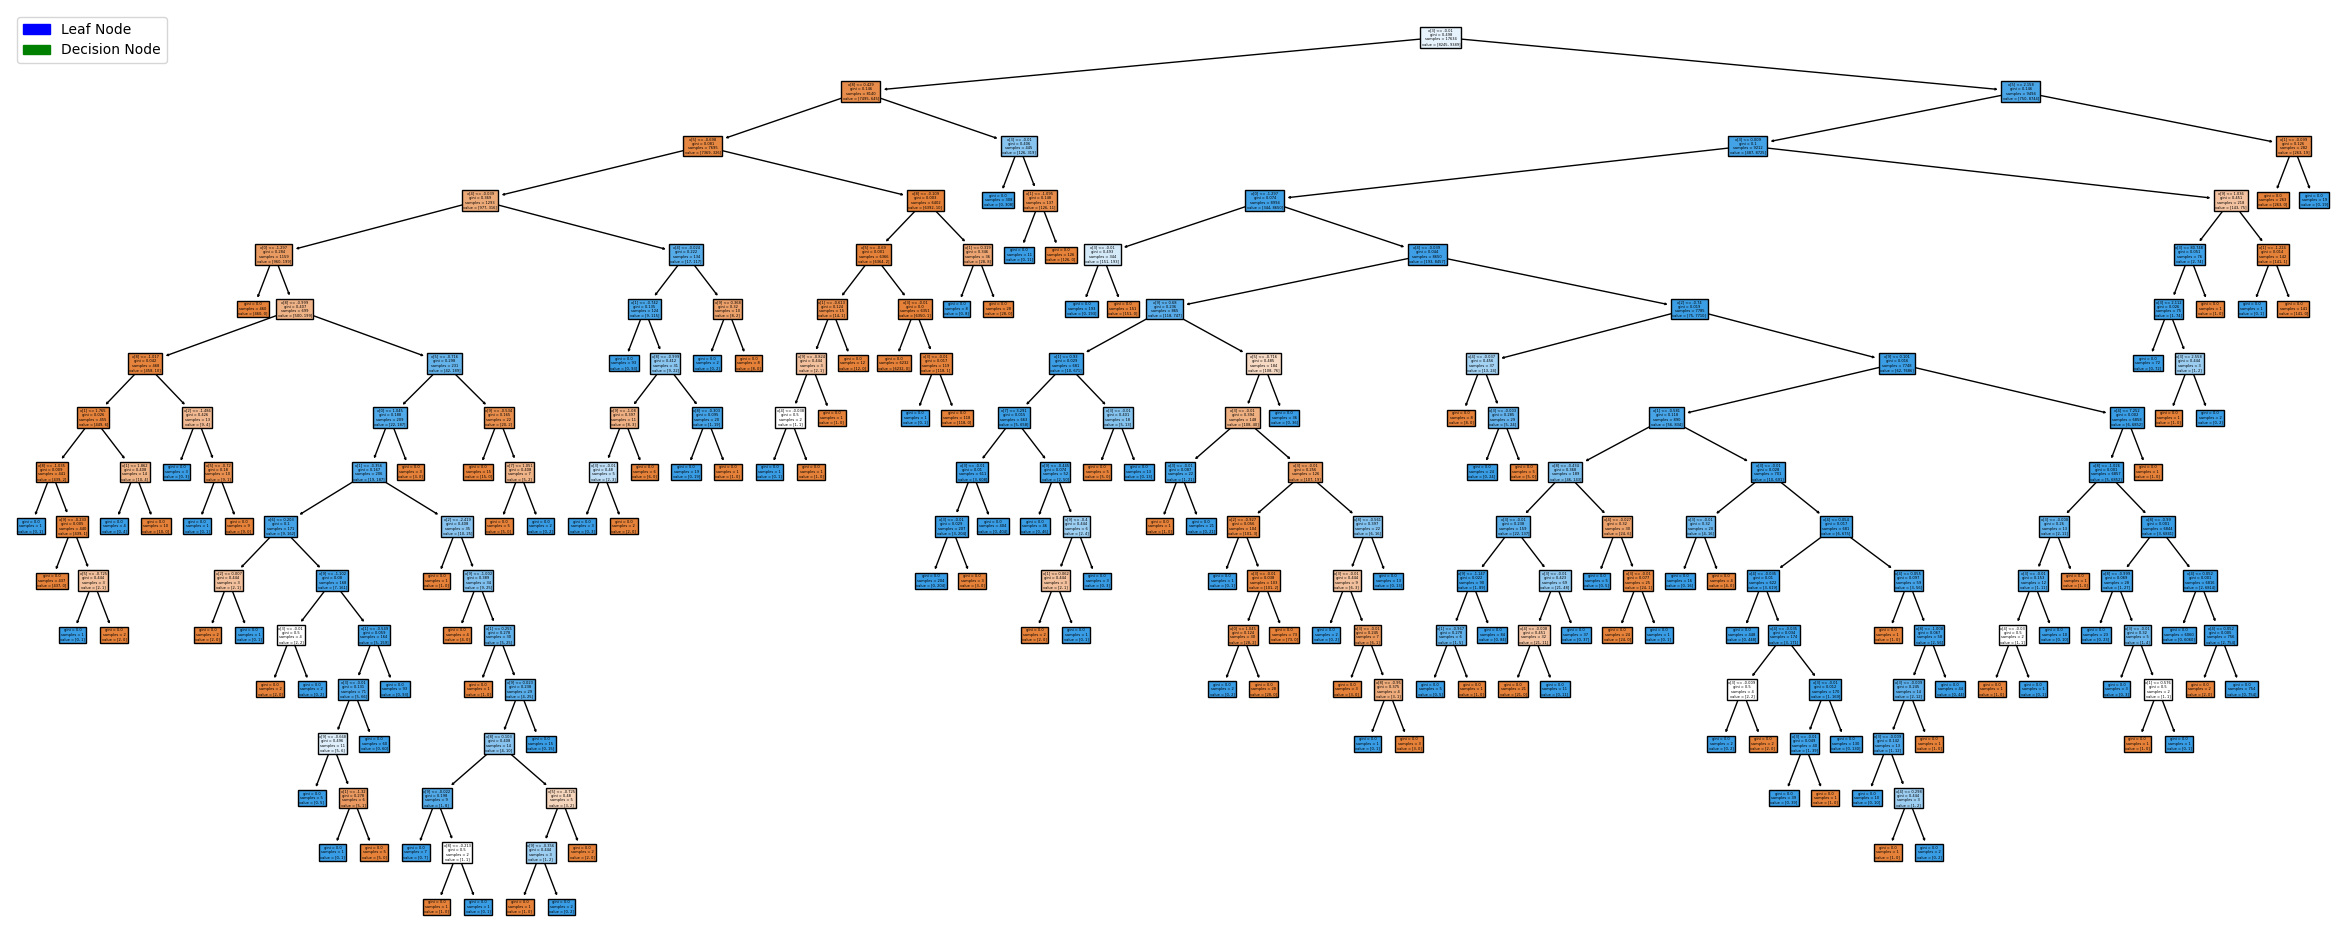

In [151]:
import matplotlib.patches as patches

# Create the plot
fig = plt.figure(figsize=(30,12))
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(dt, filled=True, ax=ax)

# Create a legend
legend_elements = [
    patches.Patch(color='blue', label='Leaf Node'),
    patches.Patch(color='green', label='Decision Node')
]

ax.legend(handles=legend_elements, loc='upper left')

plt.show()


> Decision Nodes: These nodes represent splits based on the feature values. Each decision node has a condition that determines which branch to follow.
Leaf Nodes: These nodes represent the final decision or prediction made by the tree. Leaf nodes provide the class label or predicted value.

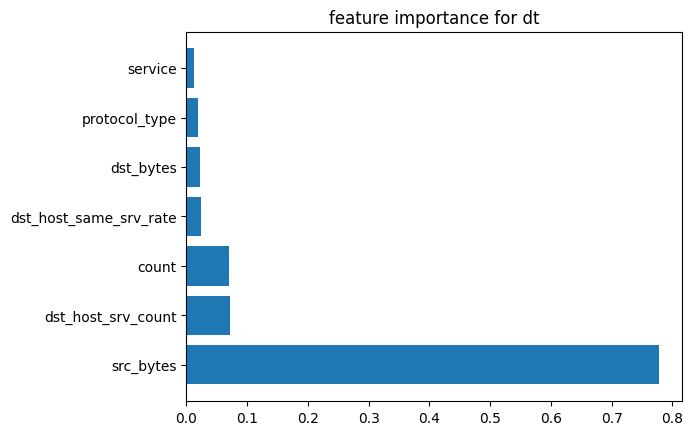

In [152]:

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(dt.feature_importances_), features_names, top=7)

In [153]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

# **Random Forest Classifier**

In [154]:
'''rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features'''

'rfc = RandomForestClassifier()\n\nrfe = RFE(rfc, n_features_to_select=10)\nrfe = rfe.fit(X_train, Y_train)\n\nfeature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]\nselected_features = [v for i, v in feature_map if i==True]\n\nselected_features'

In [155]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [156]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

FrozenTrial(number=14, state=TrialState.COMPLETE, values=[0.997221487165917], datetime_start=datetime.datetime(2024, 8, 25, 17, 21, 54, 184479), datetime_complete=datetime.datetime(2024, 8, 25, 17, 21, 54, 412912), params={'rf_max_depth': 16, 'rf_max_features': 6, 'rf_n_estimators': 11}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=14, value=None)


In [157]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'], n_estimators = study_rf.best_trial.params['rf_n_estimators'])
rf.fit(x_train, y_train)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 0.9997164568447318
Test Score: 0.9961630060862662


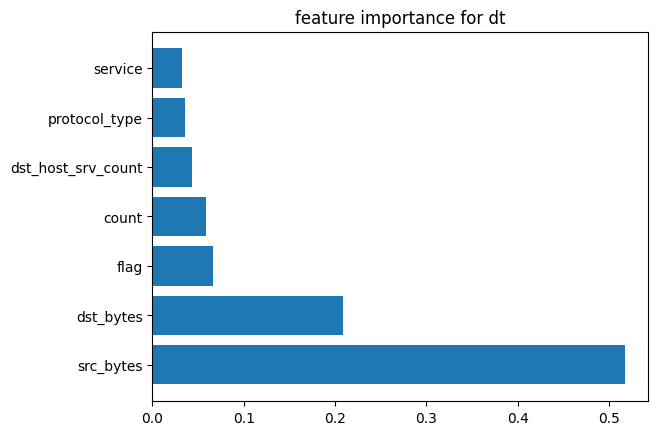

In [158]:
def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

features_names = selected_features
f_importance(abs(rf.feature_importances_), features_names, top=7)

# **SKLearn Gradient Boosting Model**

In [159]:
SKGB = GradientBoostingClassifier(random_state=42)
SKGB.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [160]:
SKGB_train, SKGB_test = SKGB.score(x_train , y_train), SKGB.score(x_test , y_test)

print(f"Training Score: {SKGB_train}")
print(f"Test Score: {SKGB_test}")

Training Score: 0.9947828059430646
Test Score: 0.9927229425774015


# **XGBoost Gradient Boosting Model**

In [161]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [162]:
xgb_train, xgb_test = xgb_model.score(x_train , y_train), xgb_model.score(x_test , y_test)

print(f"Training Score: {xgb_train}")
print(f"Test Score: {xgb_test}")

Training Score: 1.0
Test Score: 0.9960306959513099


# **Light Gradient Boosting Model**

In [163]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932


LGBMClassifier(random_state=42)

In [164]:
lgb_train, lgb_test = lgb_model.score(x_train , y_train), lgb_model.score(x_test , y_test)

print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

Training Score: 1.0
Test Score: 0.9965599364911352


# **SKLearn AdaBoost Model**

In [165]:
ab_model = AdaBoostClassifier(random_state=42)

In [166]:
ab_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [167]:
ab_train, ab_test = ab_model.score(x_train , y_train), ab_model.score(x_test , y_test)

print(f"Training Score: {ab_train}")
print(f"Test Score: {ab_test}")

Training Score: 0.9800385618691165
Test Score: 0.9790949986768986


# **CatBoost Classifier Model**

In [168]:
cb_model = CatBoostClassifier(verbose=0)

In [169]:
cb_model.fit(x_train, y_train)

In [170]:
cb_train, cb_test = cb_model.score(x_train , y_train), cb_model.score(x_test , y_test)

print(f"Training Score: {cb_train}")
print(f"Test Score: {cb_test}")

Training Score: 0.9985822842236588
Test Score: 0.9956337655464409


# **Naive Baye Model**

In [171]:
BNB_model = BernoulliNB()
BNB_model.fit(x_train, y_train)

BernoulliNB()

In [172]:
BNB_train, BNB_test = BNB_model.score(x_train , y_train), BNB_model.score(x_test , y_test)

print(f"Training Score: {BNB_train}")
print(f"Test Score: {BNB_test}")

Training Score: 0.8975842123171147
Test Score: 0.8970627150039693


# **Voting Model**

In [173]:
v_clf = VotingClassifier(estimators=[('KNeighborsClassifier', KNN_model), ("XGBClassifier", xgb_model), ("RandomForestClassifier", rf), ("DecisionTree", dt), ("XGBoost", xgb_model), ("LightGB", lgb_model), ("AdaBoost", ab_model), ("Catboost", cb_model)], voting = "hard")

In [174]:
v_clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932


VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=14)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_p...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('LightGB', LGBMClassifier(random_state=42)),
                             ('AdaBoost', AdaBoostClassifier(random_state=42)),
                             ('Catboost',
                              <catboost.core.CatBoostClassifier object at 0x7908f2497d30>)])

In [175]:
voting_train, voting_test = v_clf.score(x_train , y_train), v_clf.score(x_test , y_test)

print(f"Training Score: {voting_train}")
print(f"Test Score: {voting_test}")

Training Score: 1.0
Test Score: 0.9960306959513099


# **Conclusion**

In [176]:
# Add Isolation Forest to the results
data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test], 
        ["Random Forest", rf_train, rf_test], 
        ["GBM", SKGB_train, SKGB_test], 
        ["XGBM", xgb_train, xgb_test], 
        ["Adaboost", ab_train, ab_test], 
        ["light GBM", lgb_train, lgb_test],
        ["CatBoost", cb_train, cb_test], 
        ["Naive Baye Model", BNB_train, BNB_test], 
        ["Voting", voting_train, voting_test],
        ["Isolation Forest", anomalies_train / len(X_train_if), normal_train / len(X_train_if)]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))


╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │     0.980719  │     0.980418 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │     0.928774  │     0.923128 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │     1         │     0.995237 │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │     0.999716  │     0.996163 │
├─────────────────────┼───────────────┼──────────────┤
│ GBM                 │     0.994783  │     0.992723 │
├─────────────────────┼───────────────┼──────────────┤
│ XGBM                │     1         │     0.996031 │
├─────────────────────┼───────────────┼──────────────┤
│ Adaboost            │     0.980039  │     0.979095 │
├─────────────────────┼───────────────┼──────────────┤
│ light GBM           │     1         │     0.99656  │
├─────────

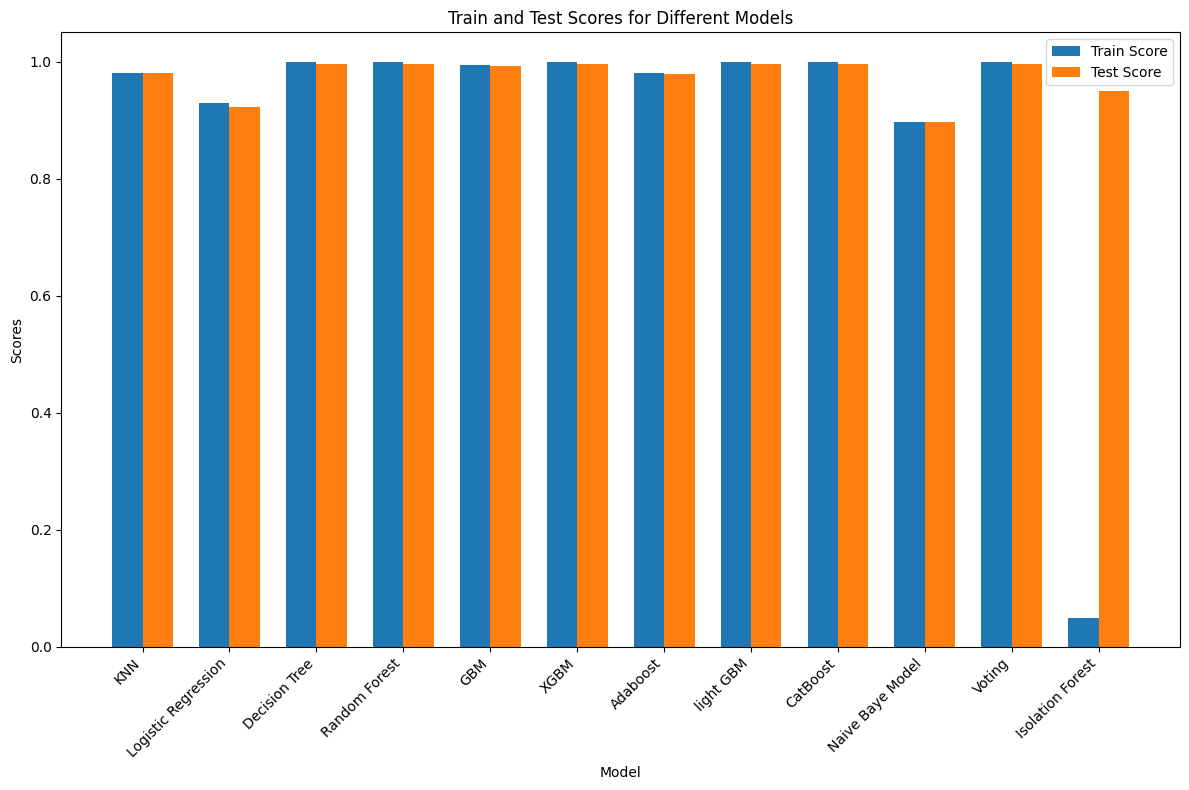

In [177]:
models = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest", "GBM", 
          "XGBM", "Adaboost", "light GBM", "CatBoost", "Naive Baye Model", 
          "Voting", "Isolation Forest"]
train_scores = [KNN_train, lg_train, dt_train, rf_train, SKGB_train, xgb_train, 
                 ab_train, lgb_train, cb_train, BNB_train, voting_train, 
                 anomalies_train / len(X_train_if)]
test_scores = [KNN_test, lg_test, dt_test, rf_test, SKGB_test, xgb_test, 
                ab_test, lgb_test, cb_test, BNB_test, voting_test, 
                normal_train / len(X_train_if)]

# Bar chart configuration
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, train_scores, width, label='Train Score')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Train and Test Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


In [178]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


**Plotting confusion matrix using different models**

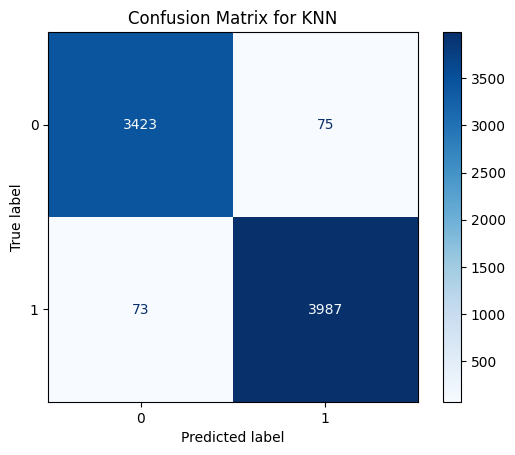

In [179]:
# For KNN
plot_confusion_matrix(KNN_model, x_test, y_test, 'KNN')


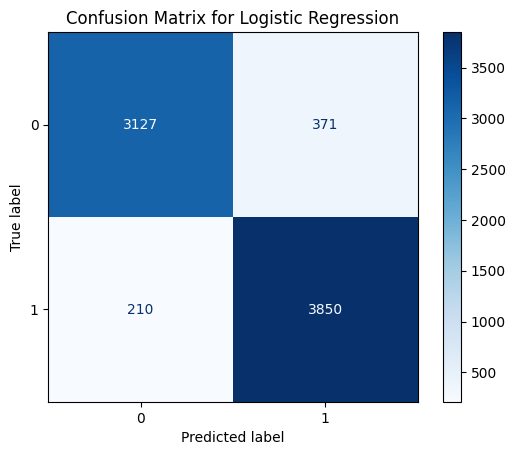

In [180]:
# For Logistic Regression
plot_confusion_matrix(lg_model, x_test, y_test, 'Logistic Regression')


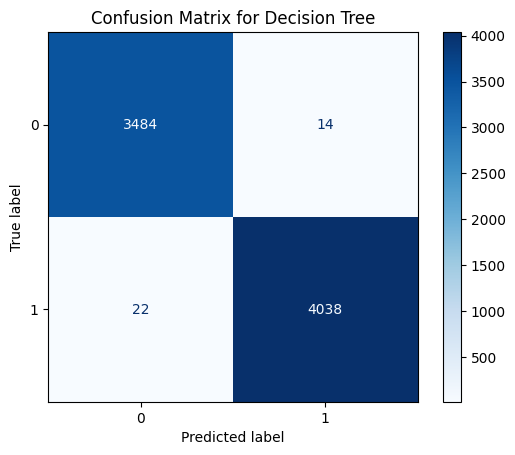

In [181]:
# For Decision Tree
plot_confusion_matrix(dt, x_test, y_test, 'Decision Tree')


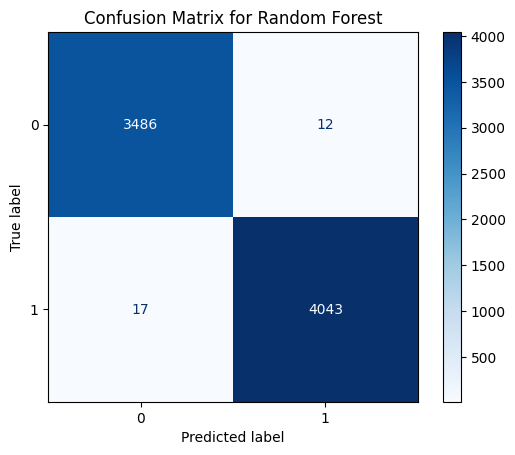

In [182]:
# For Random Forest
plot_confusion_matrix(rf, x_test, y_test, 'Random Forest')


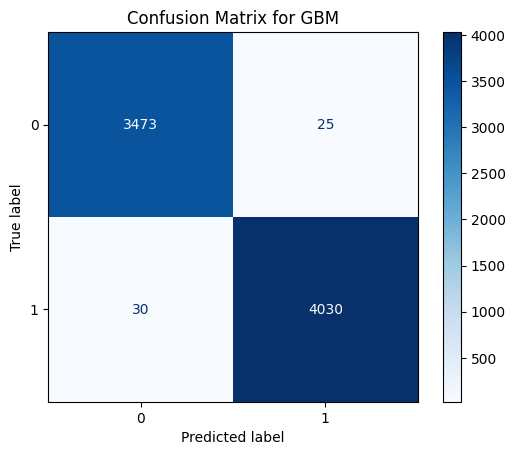

In [183]:
# For Gradient Boosting
plot_confusion_matrix(SKGB, x_test, y_test, 'GBM')


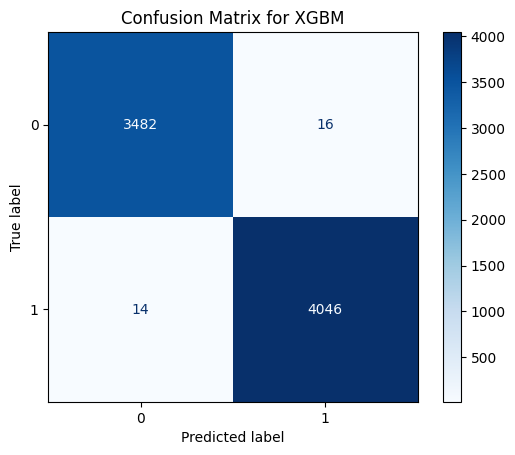

In [184]:
# For XGBoost
plot_confusion_matrix(xgb_model, x_test, y_test, 'XGBM')


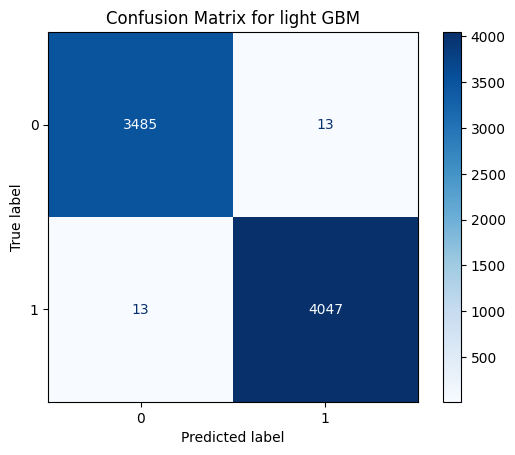

In [185]:
# For LightGBM
plot_confusion_matrix(lgb_model, x_test, y_test, 'light GBM')


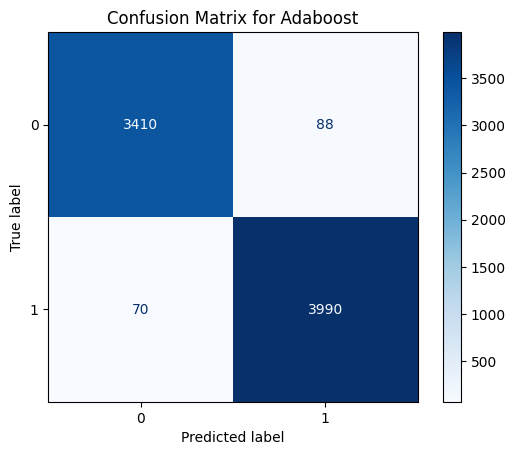

In [186]:
# For AdaBoost
plot_confusion_matrix(ab_model, x_test, y_test, 'Adaboost')


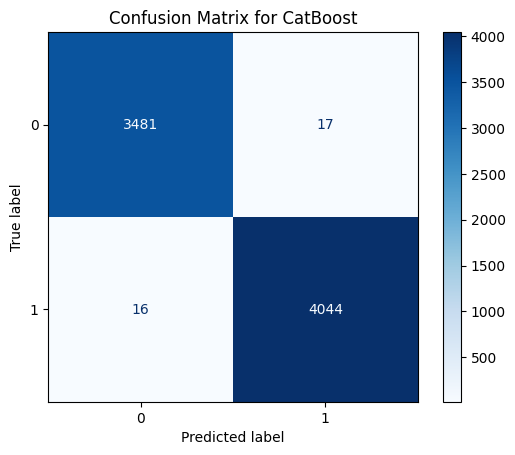

In [187]:
# For CatBoost
plot_confusion_matrix(cb_model, x_test, y_test, 'CatBoost')


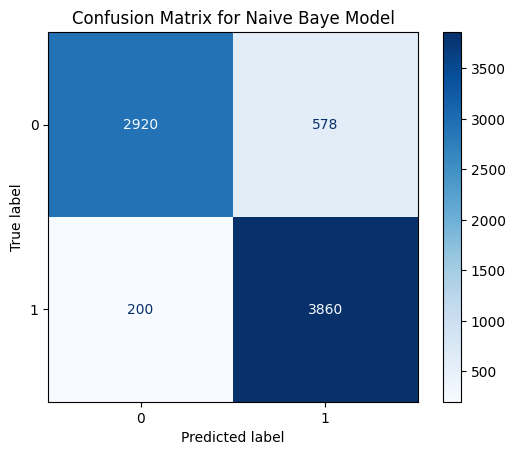

In [188]:
# For Naive Bayes
plot_confusion_matrix(BNB_model, x_test, y_test, 'Naive Baye Model')


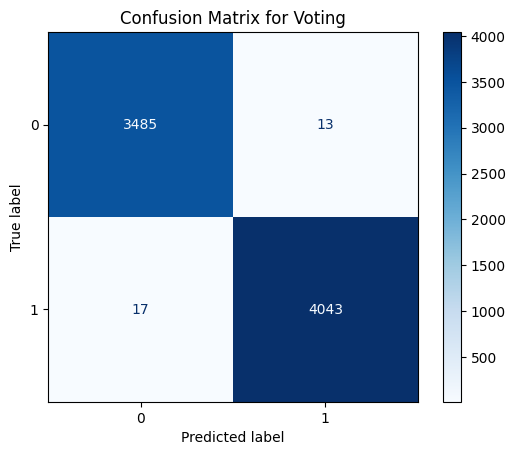

In [189]:
# For Voting Classifier
plot_confusion_matrix(v_clf, x_test, y_test, 'Voting')

In [190]:
# Anomalies are labeled as -1, and normal data as 1
anomalies = np.where(y_pred == -1)[0]
normal = np.where(y_pred == 1)[0]

# Print out the number of anomalies detected
print(f"Number of anomalies detected: {len(anomalies)}")
print(f"Number of normal data points: {len(normal)}")


Number of anomalies detected: 1260
Number of normal data points: 23932


> In summary, Isolation Forest is a tool for finding outliers, working without the need for labeled data, while classifiers are used to assign labels to data based on learned patterns from labeled training data.